# Change Point Detection Notebook for tuning

Please execute these cell after replace your data file.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# Move to your data directory.

import os
os.chdir('/content/drive/My Drive/path/to/data')

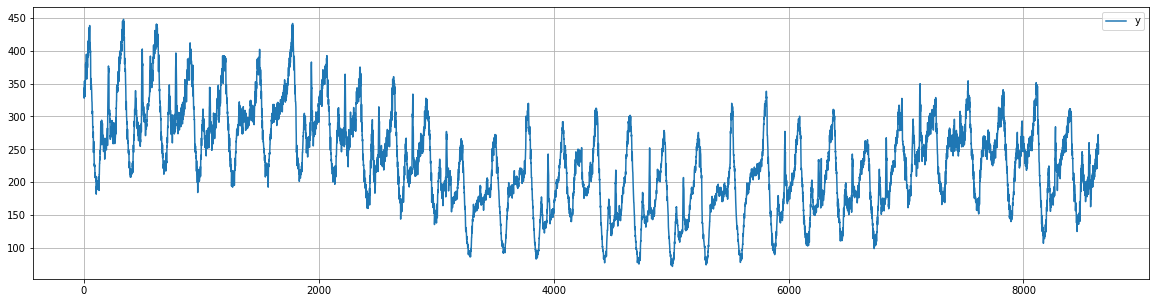

In [0]:
# Read your data and check ones.
# Many data make you easy to decide parameters.

import pandas as pd
df = pd.read_csv('sample/data2.csv')
df.plot(figsize=(20,5), grid=True)

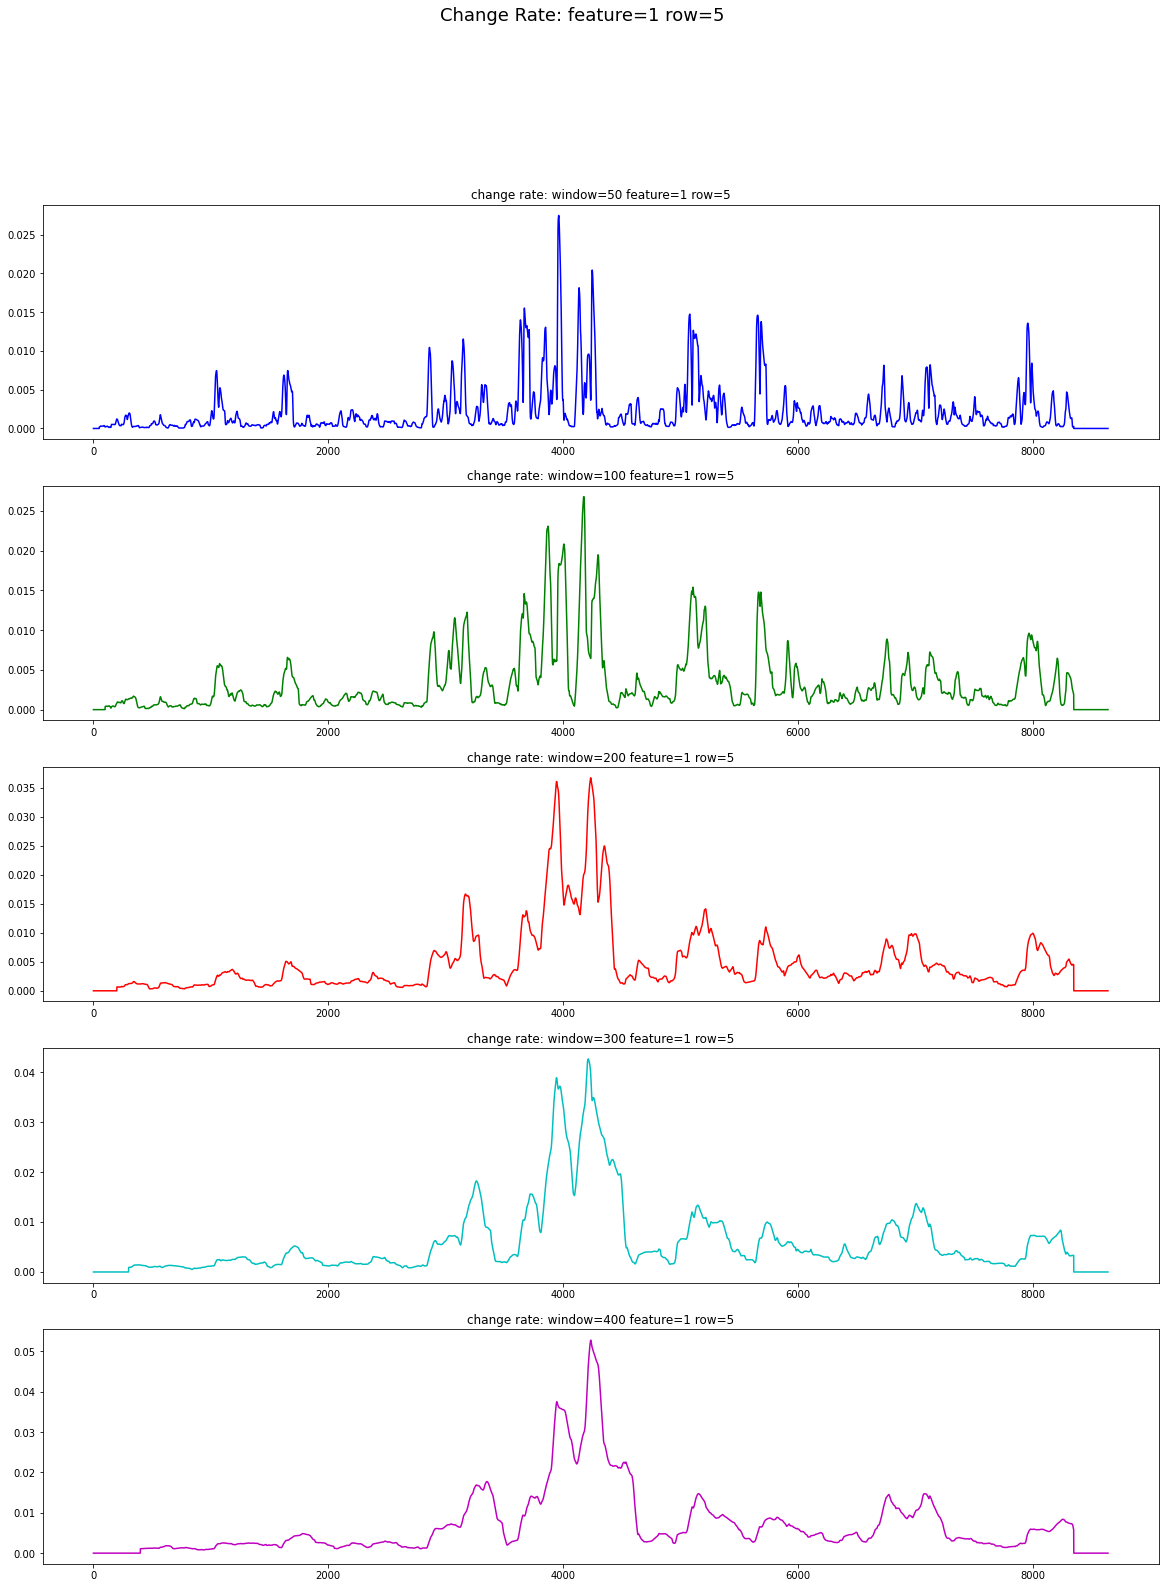

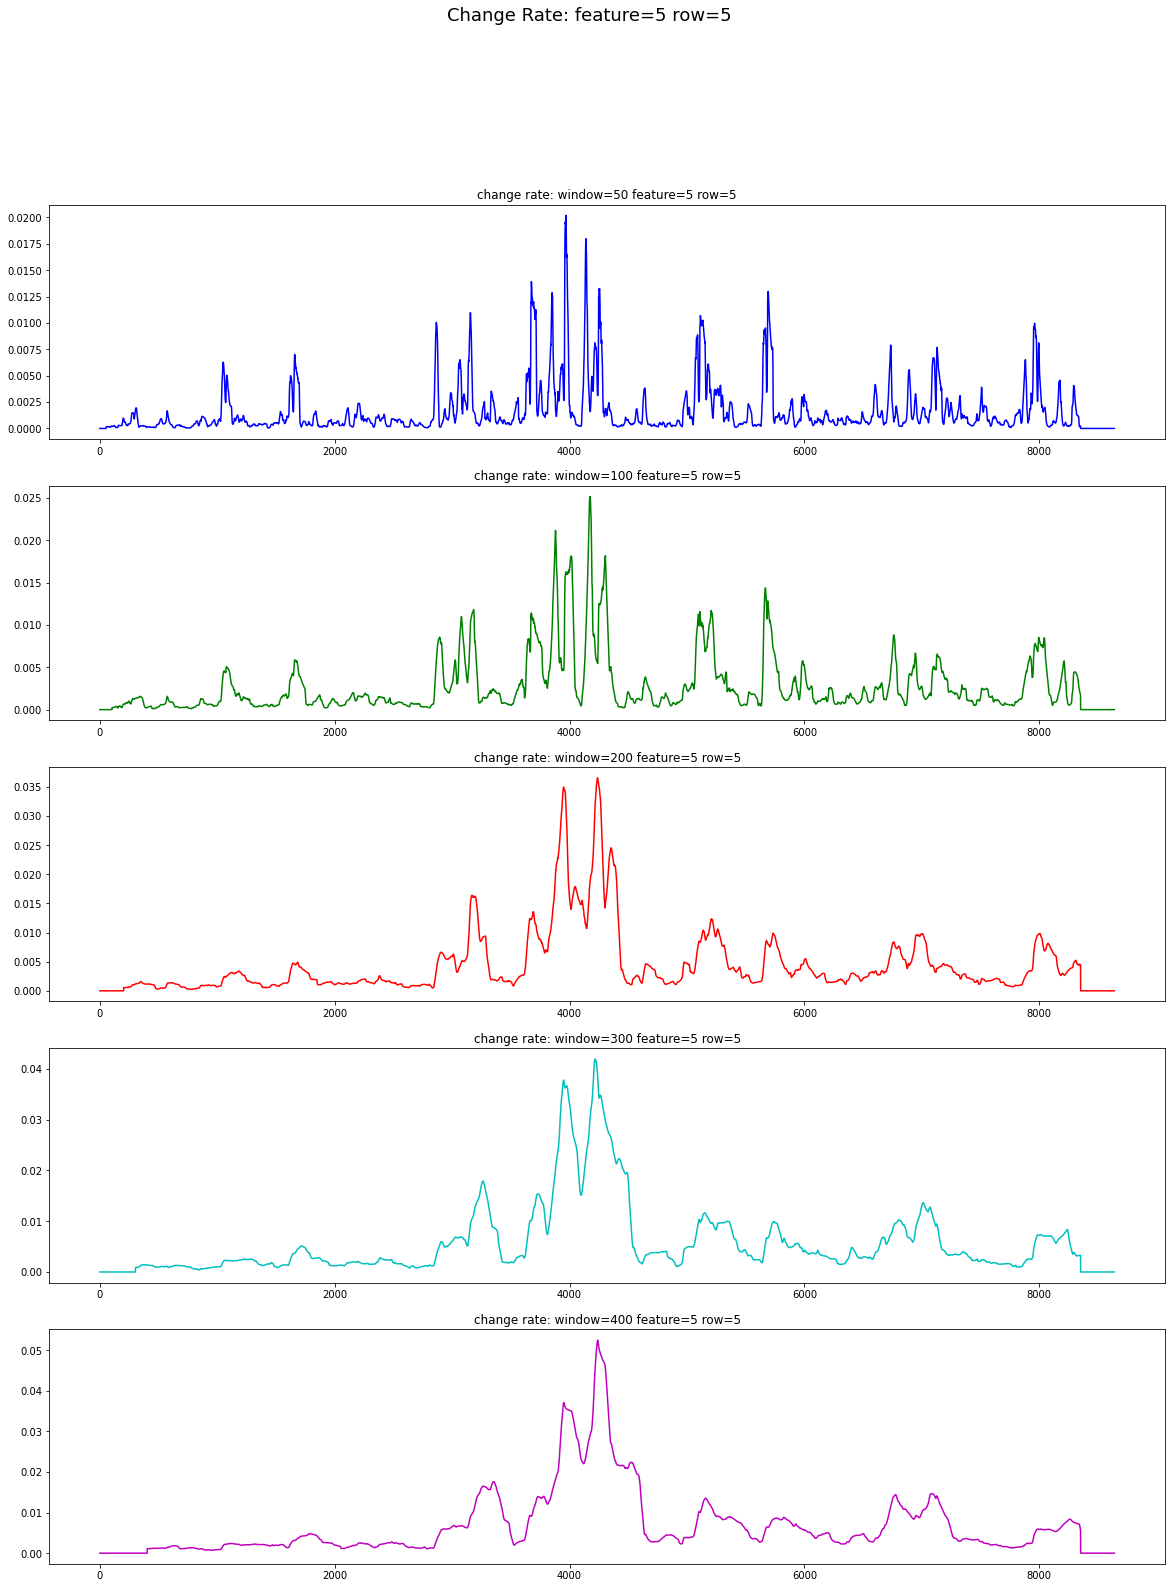

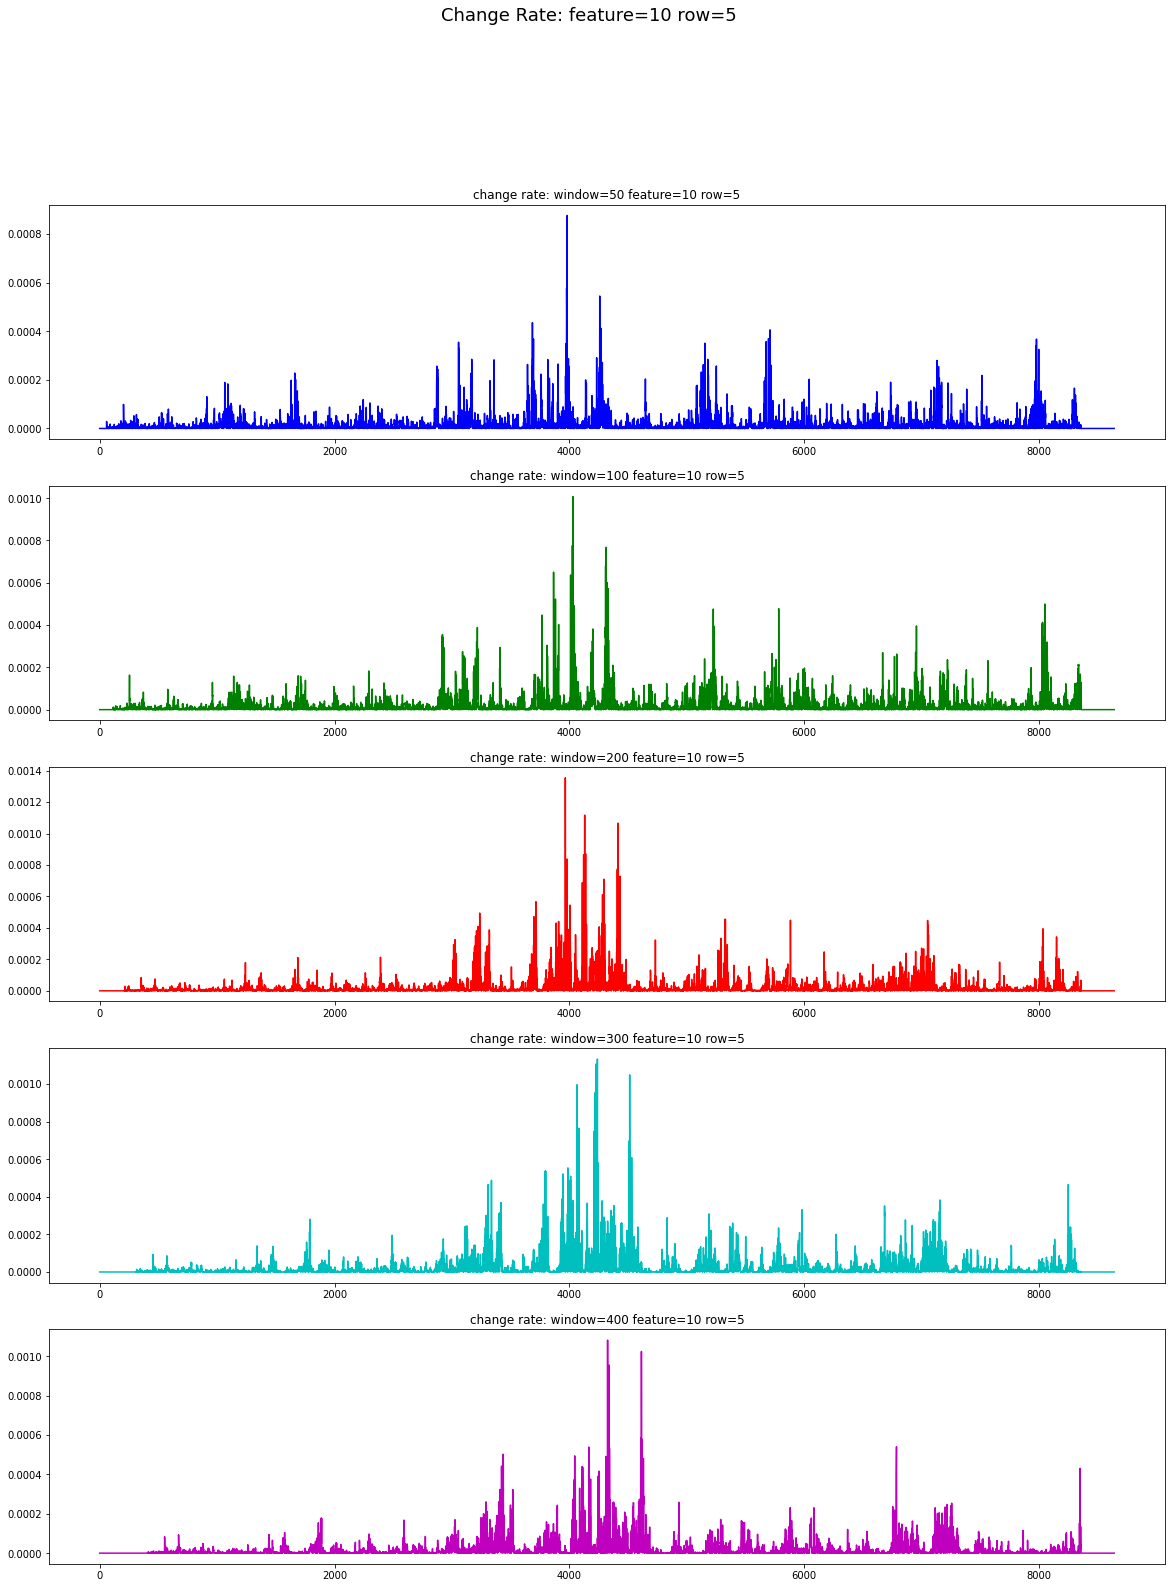

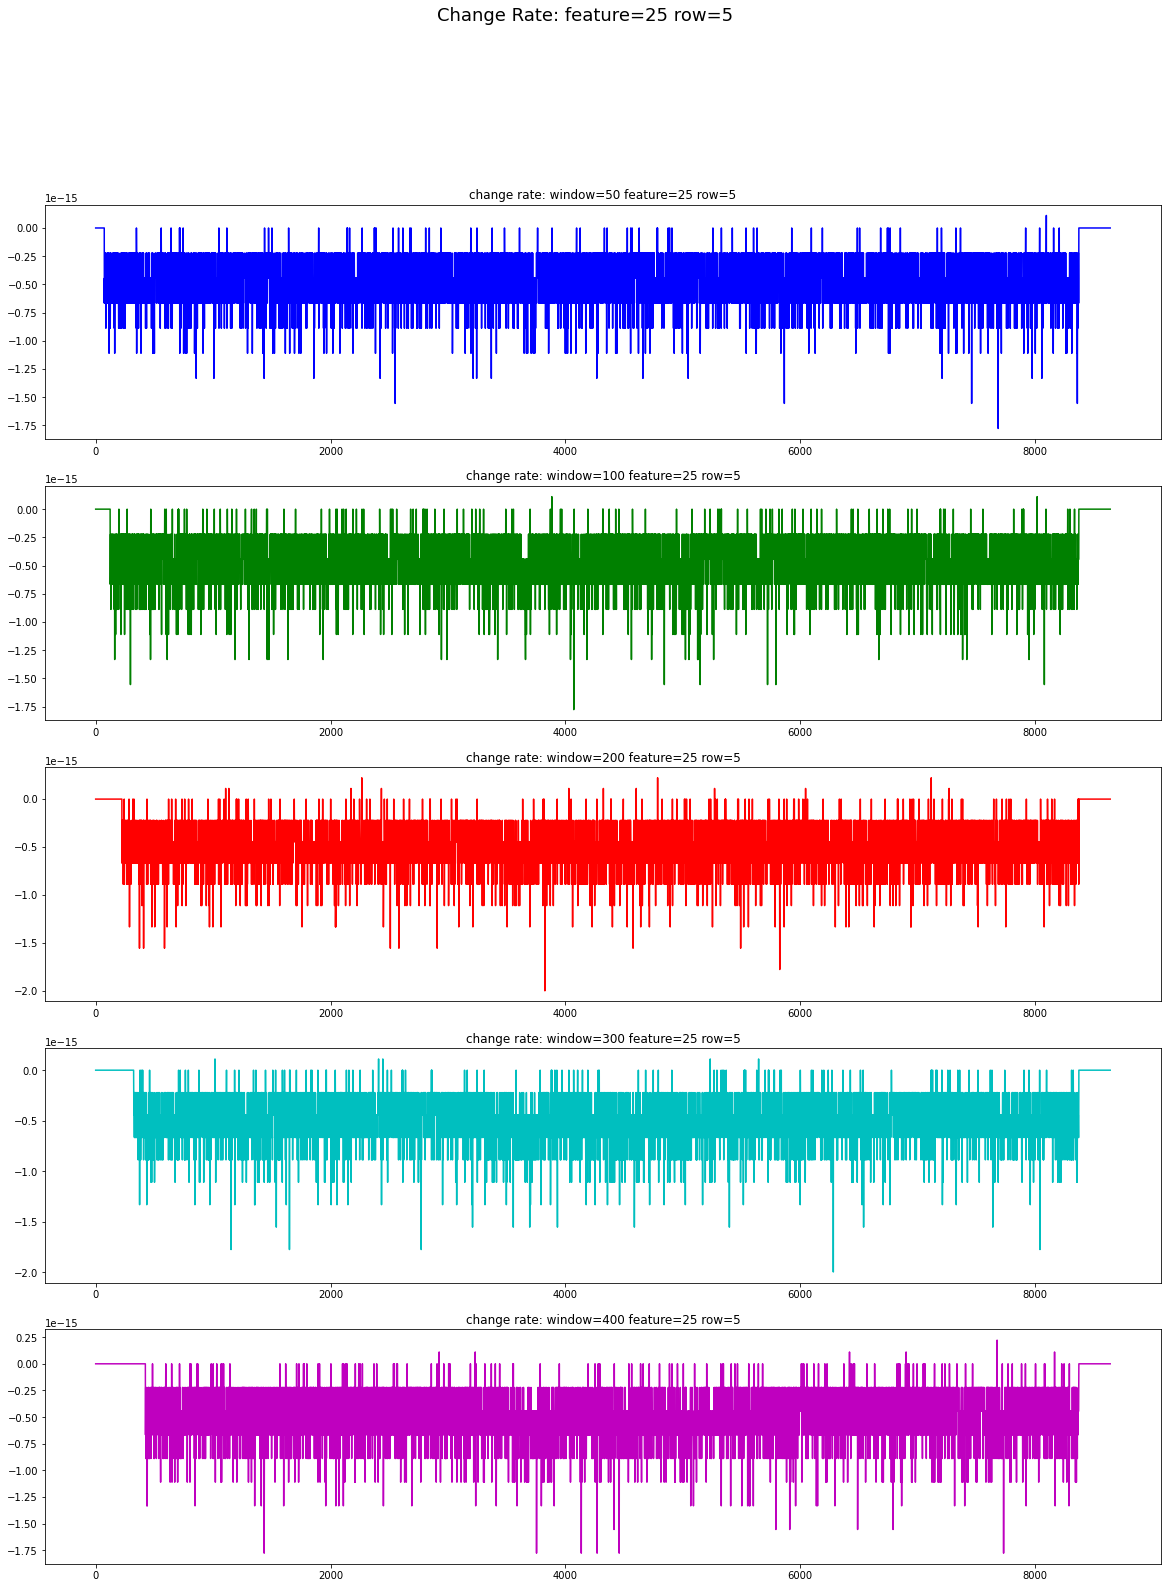

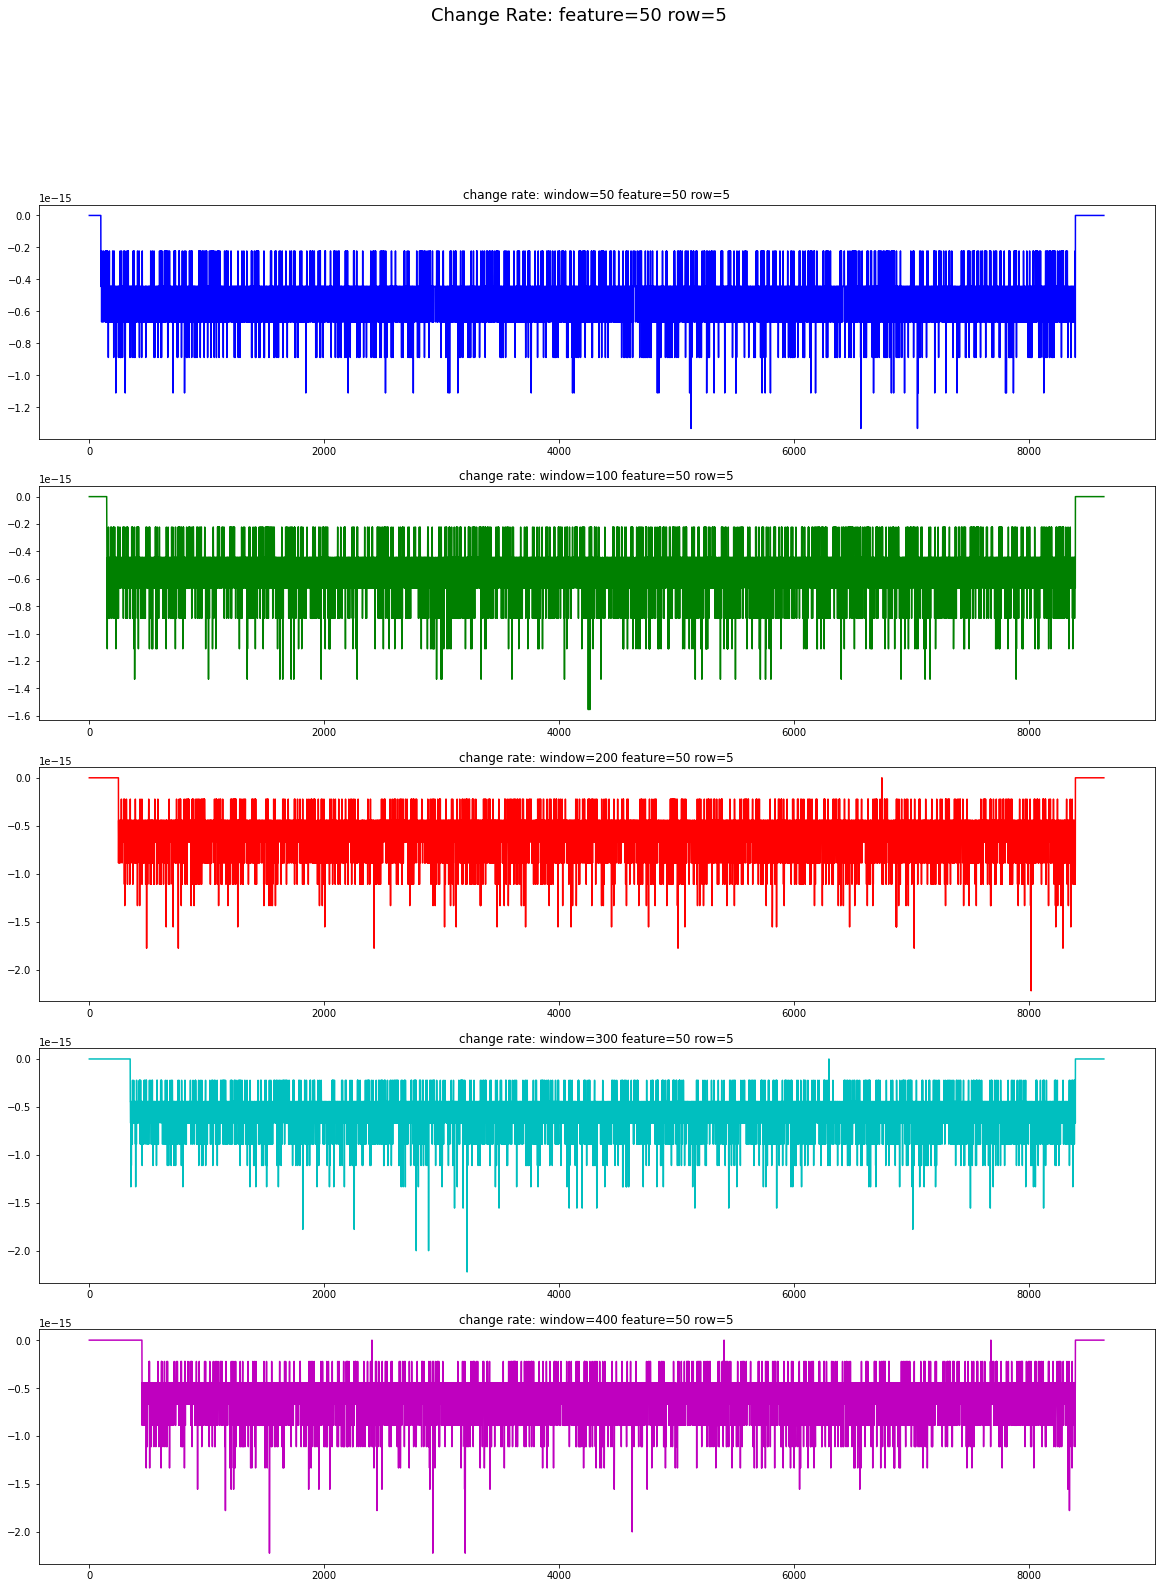

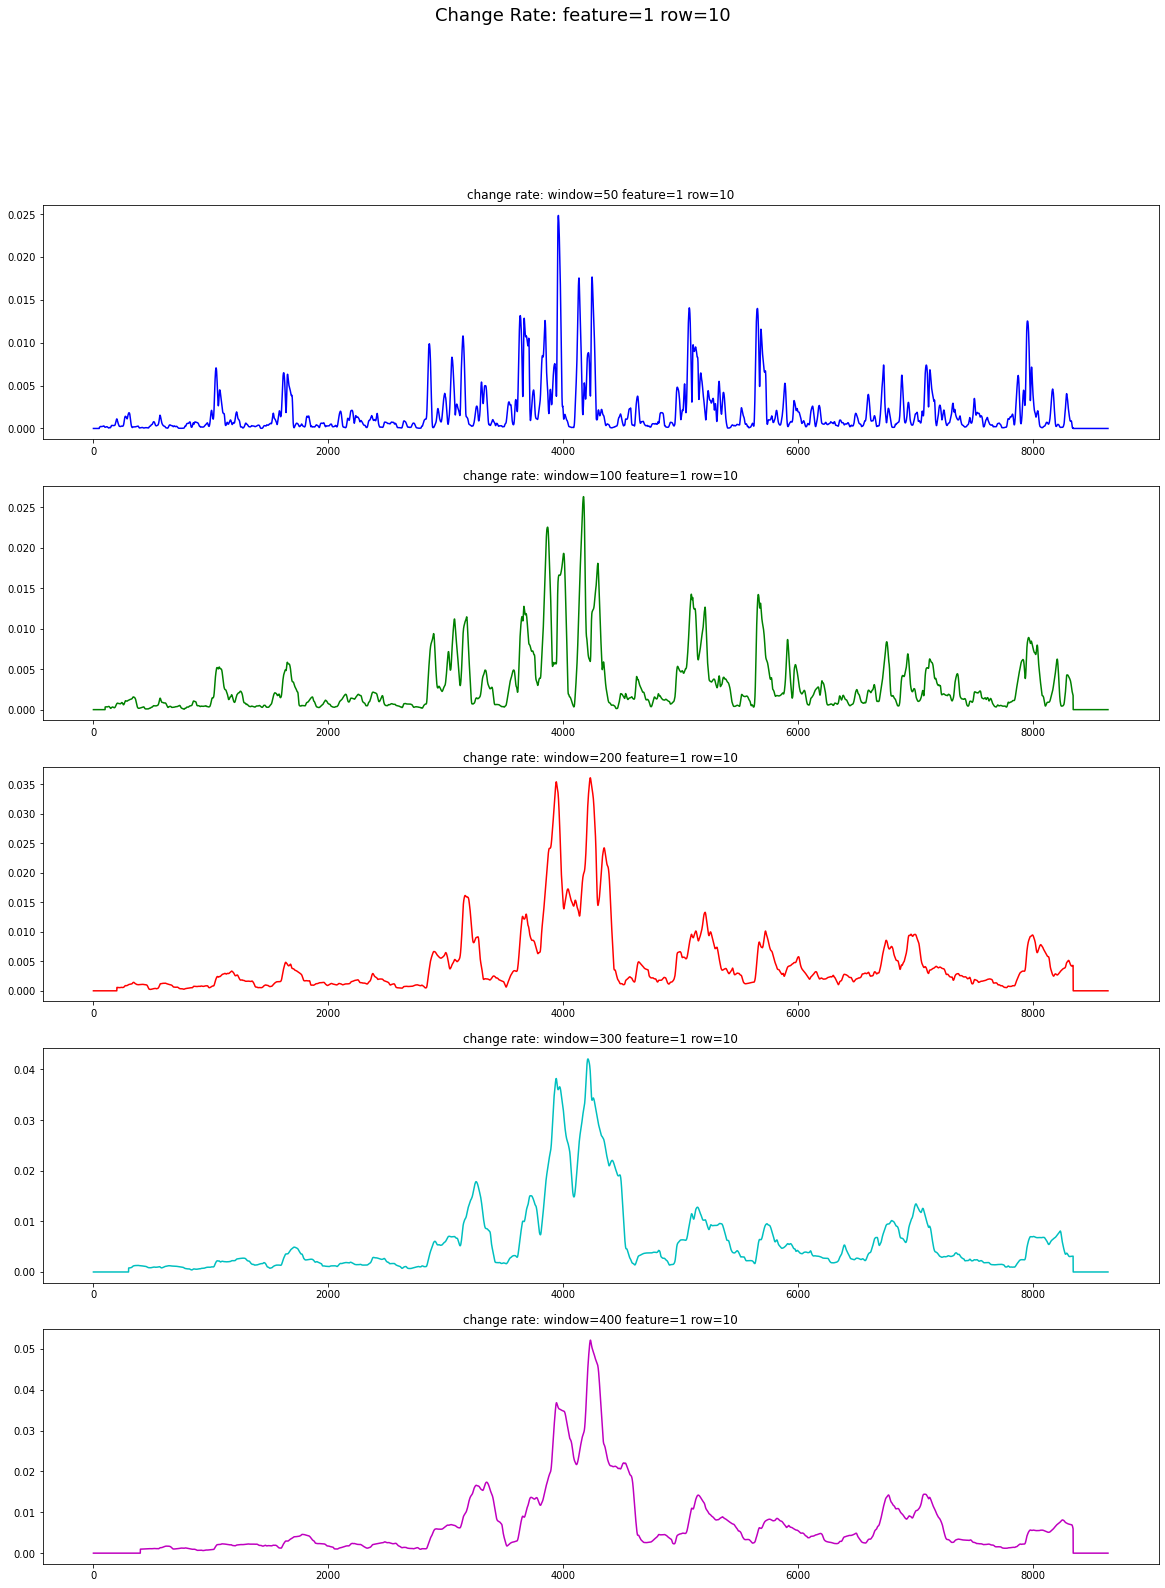

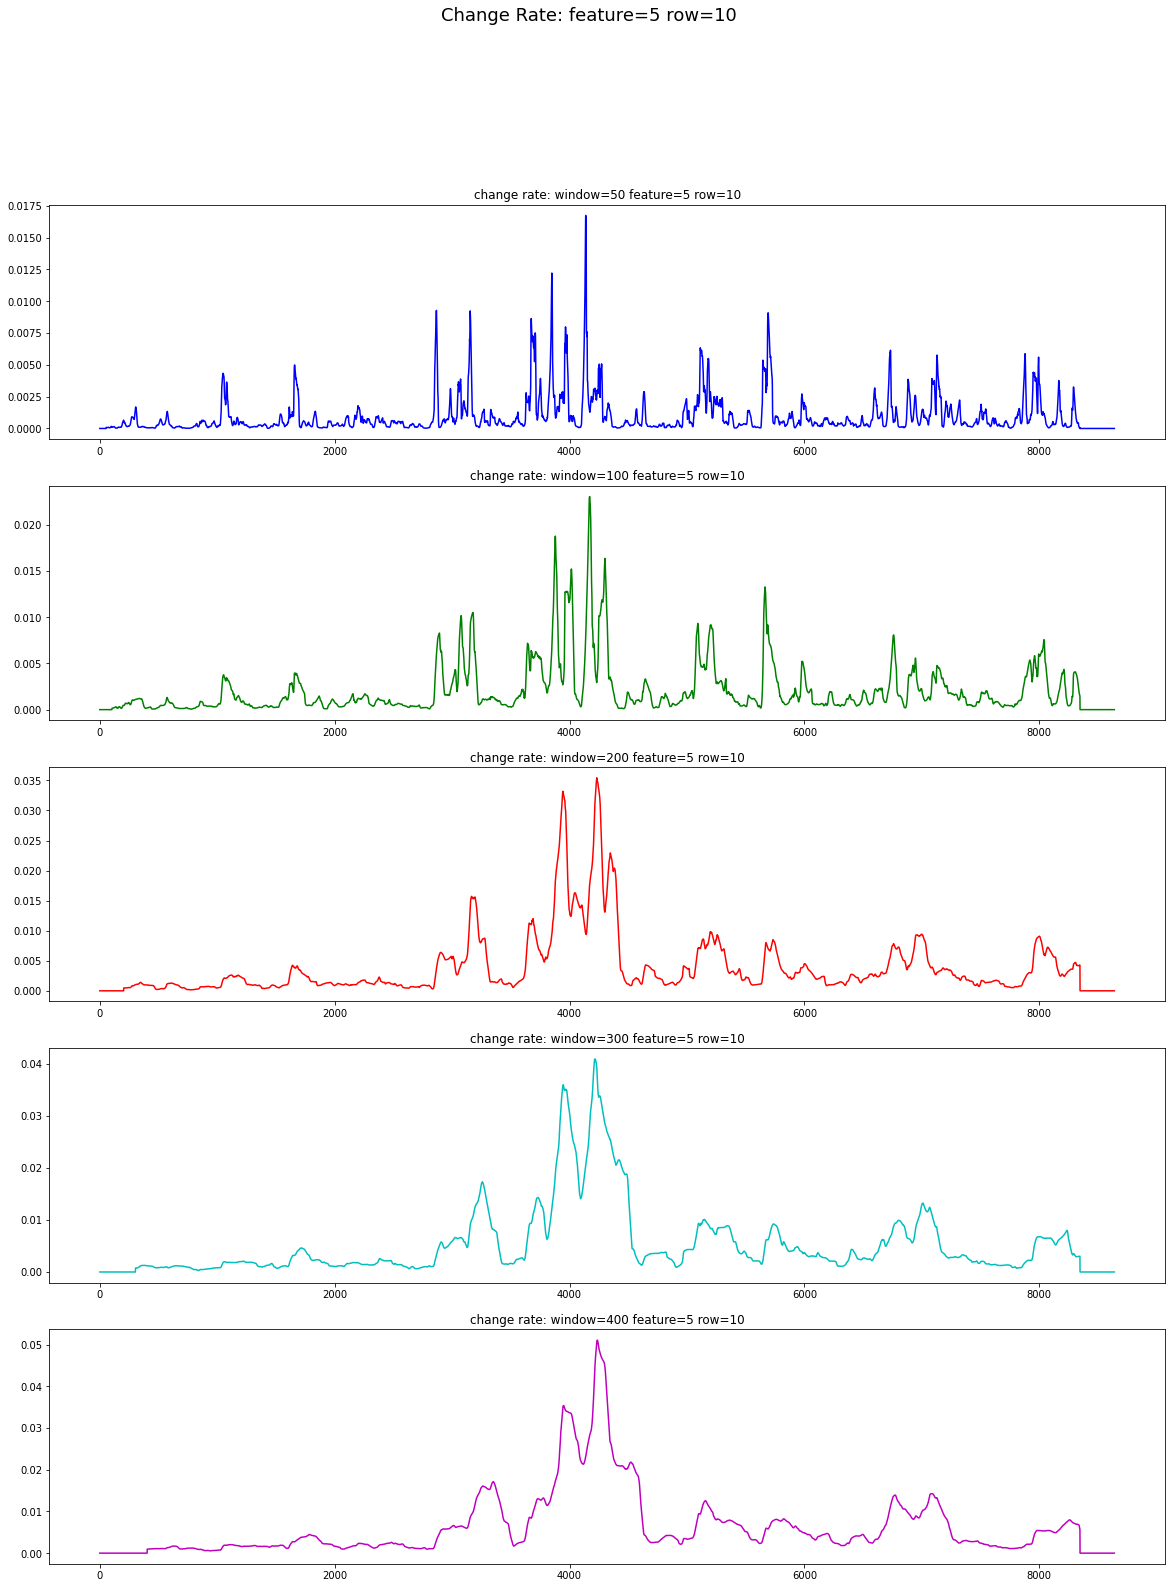

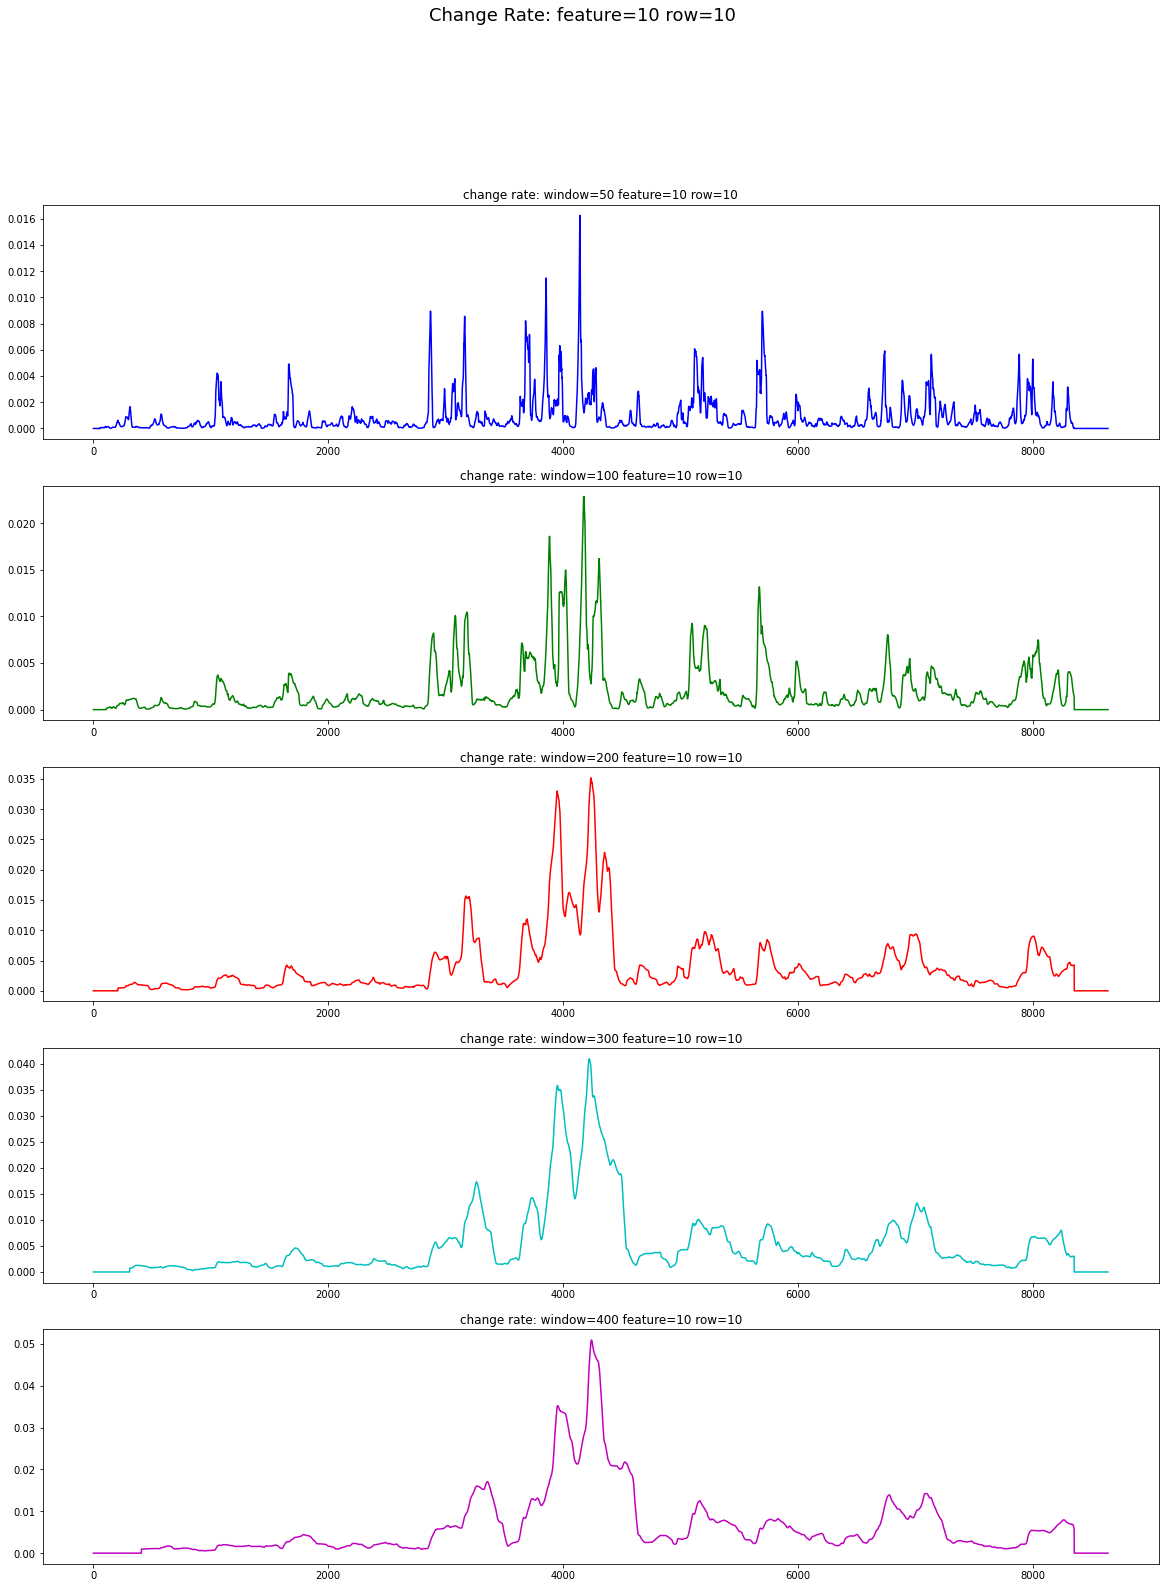

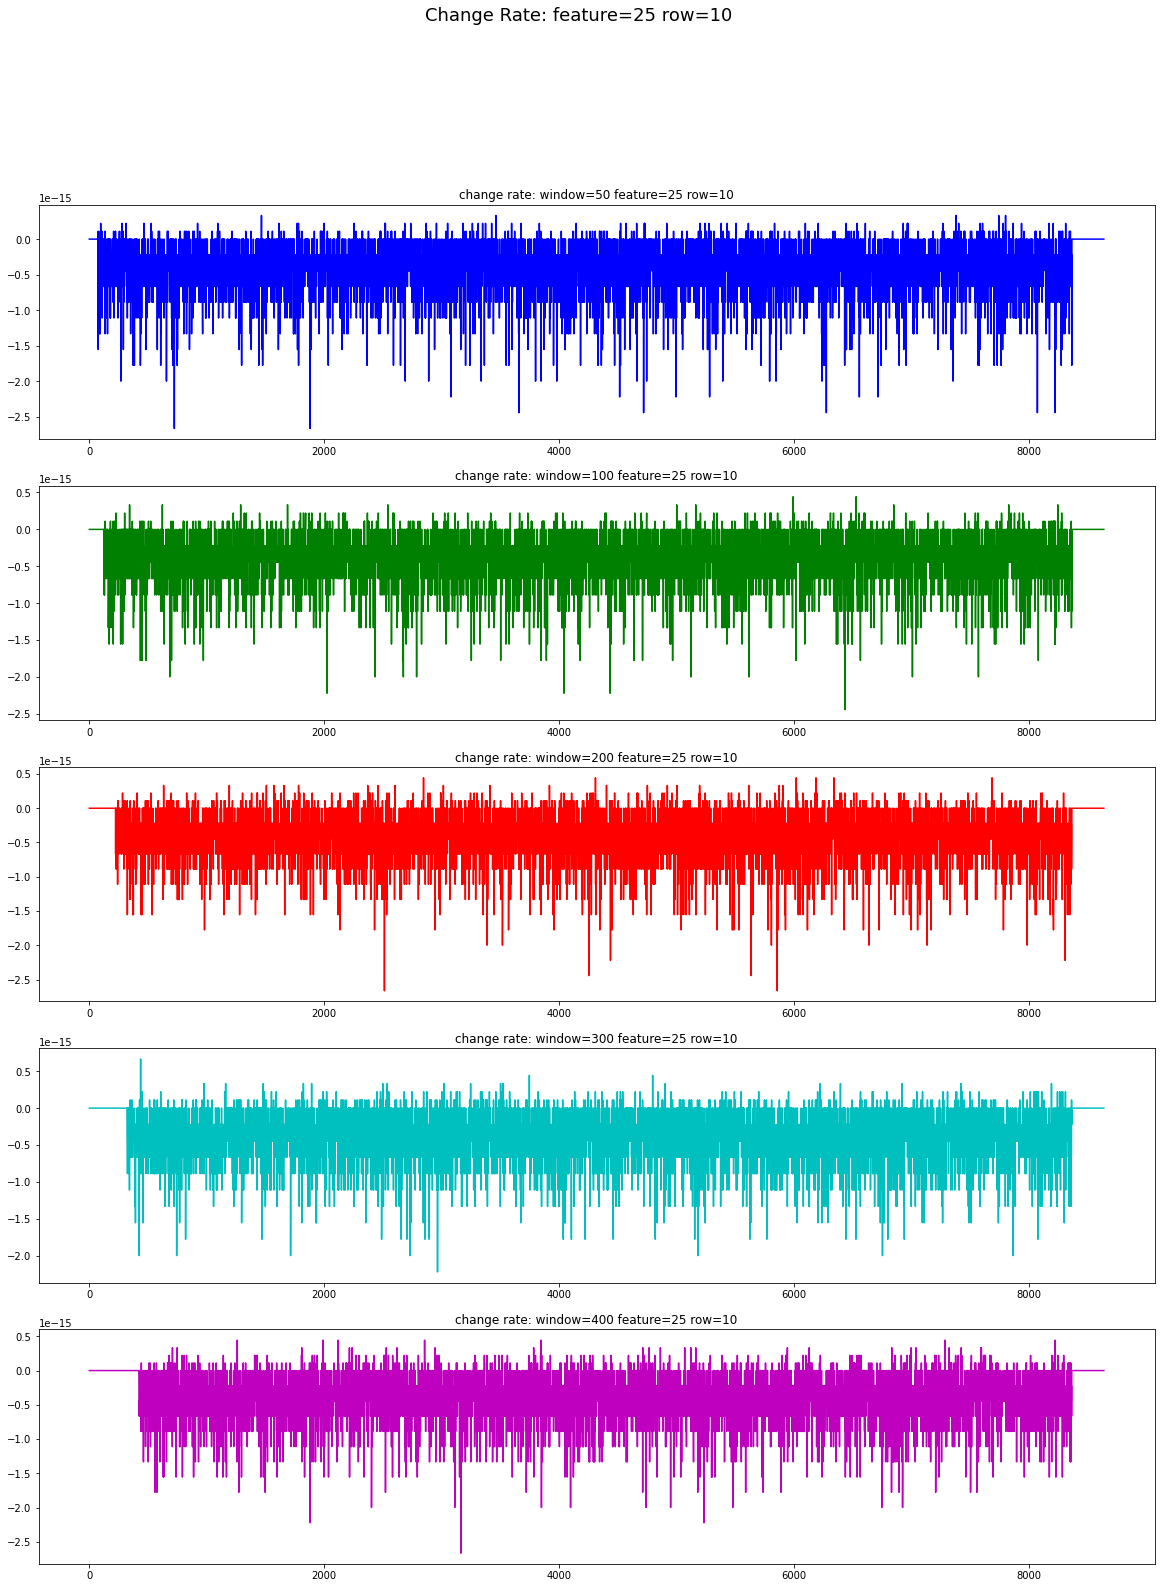

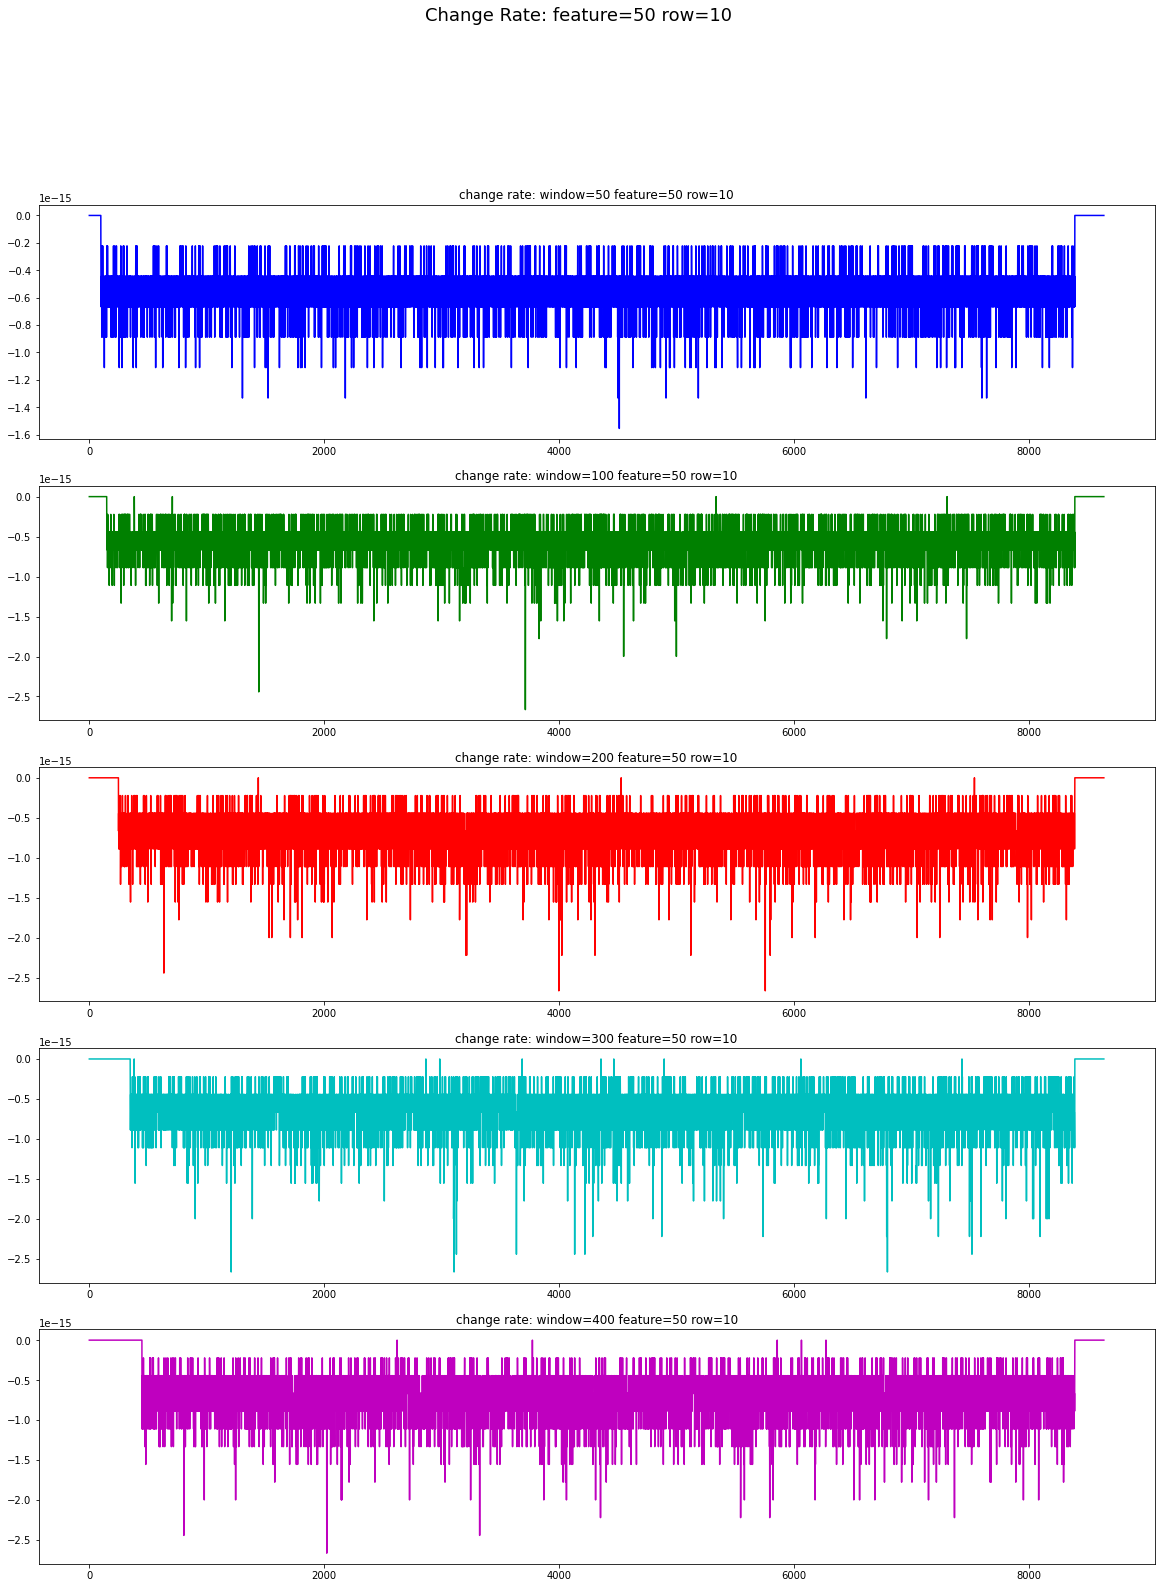

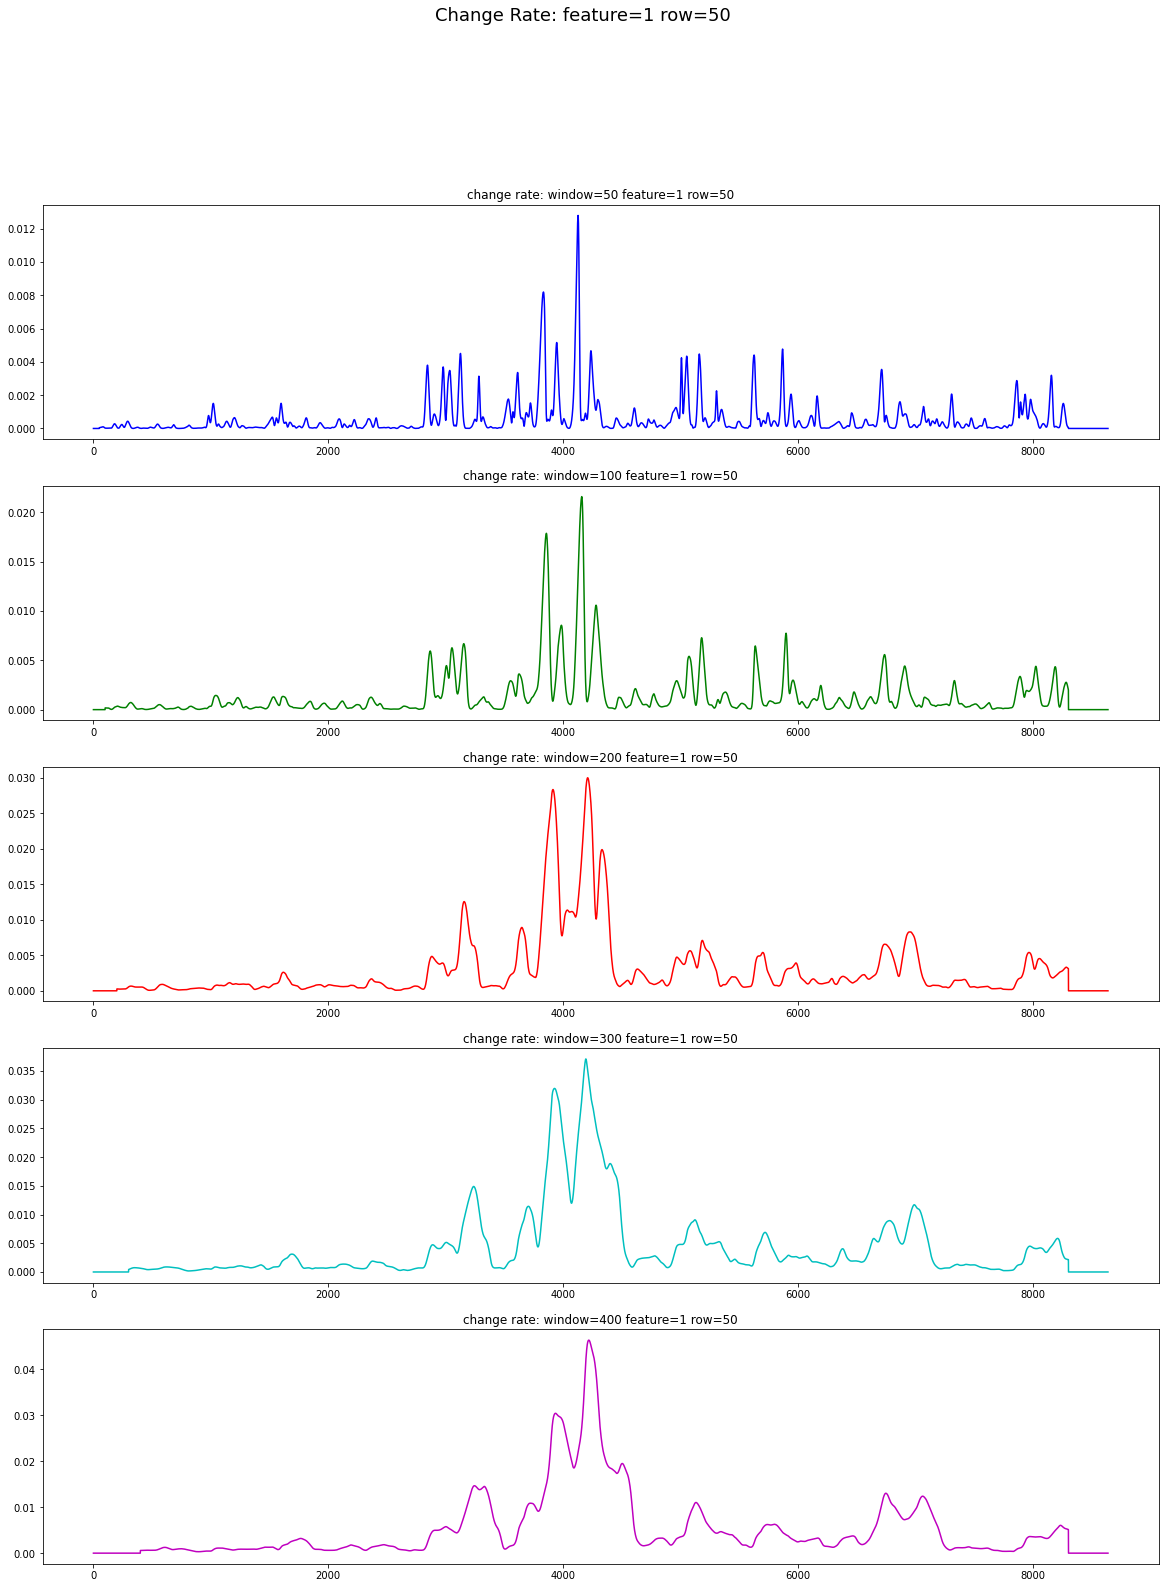

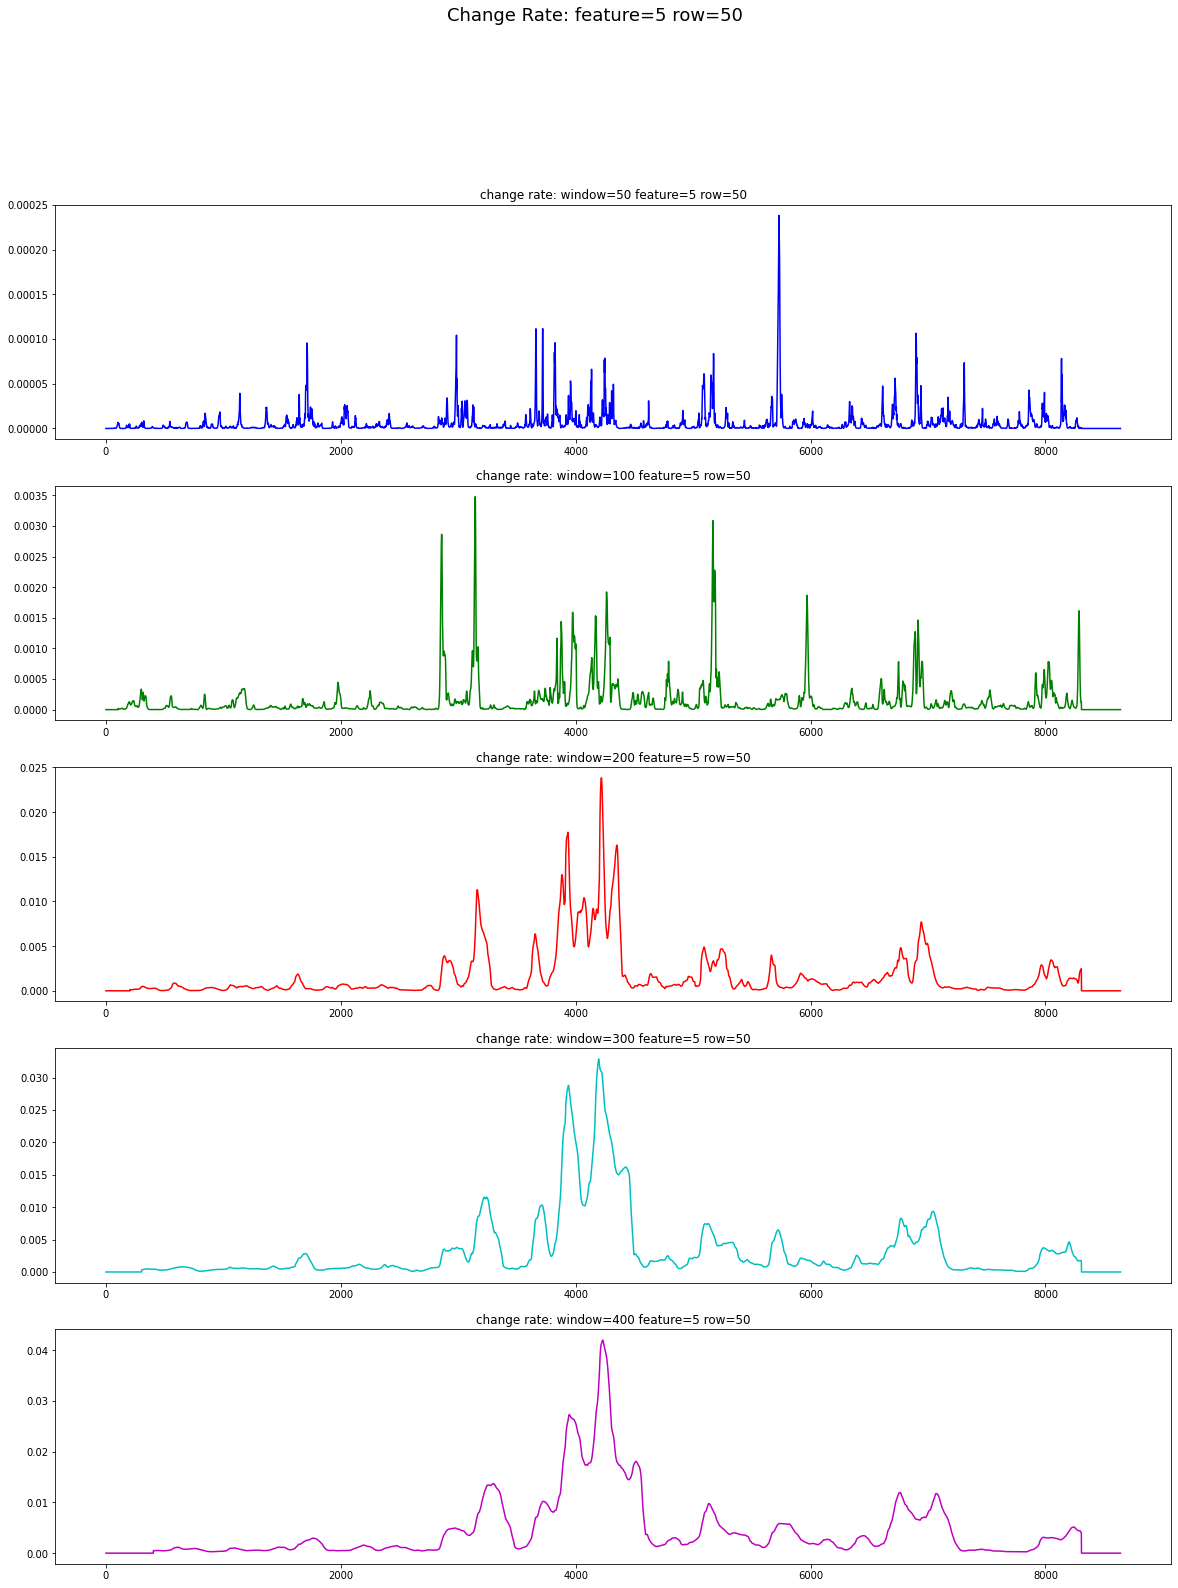

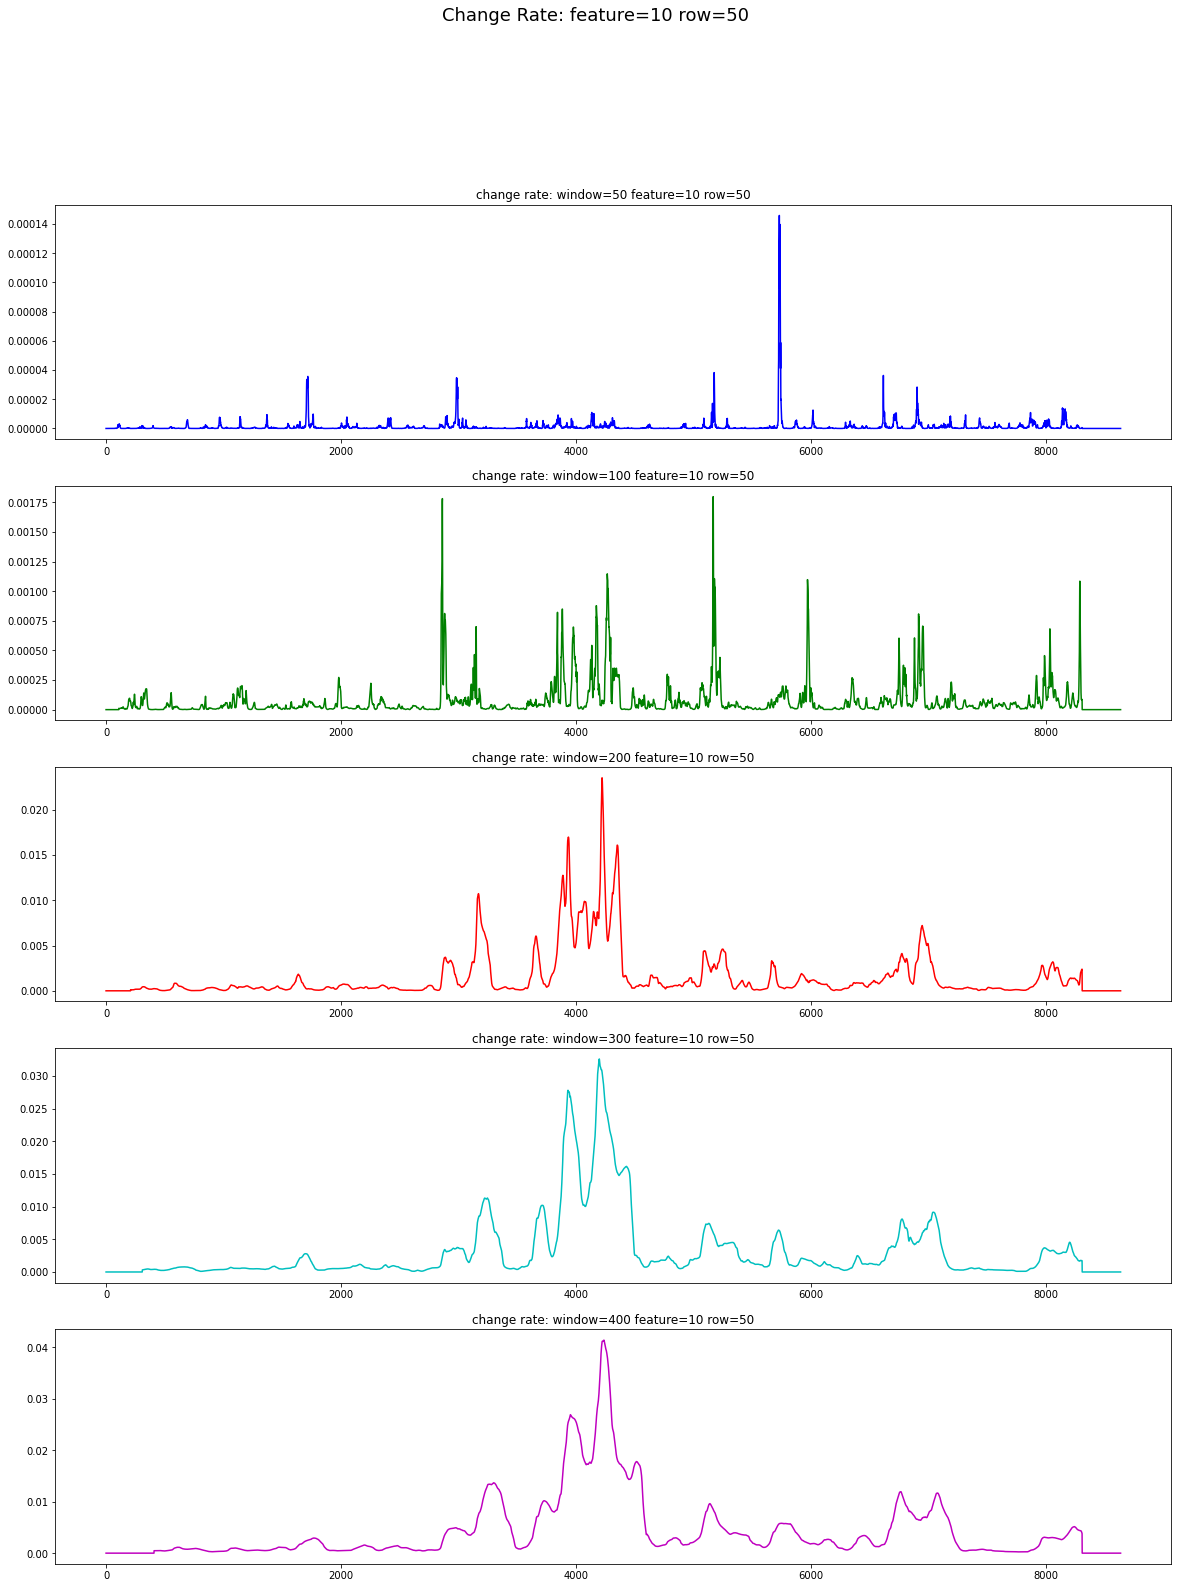

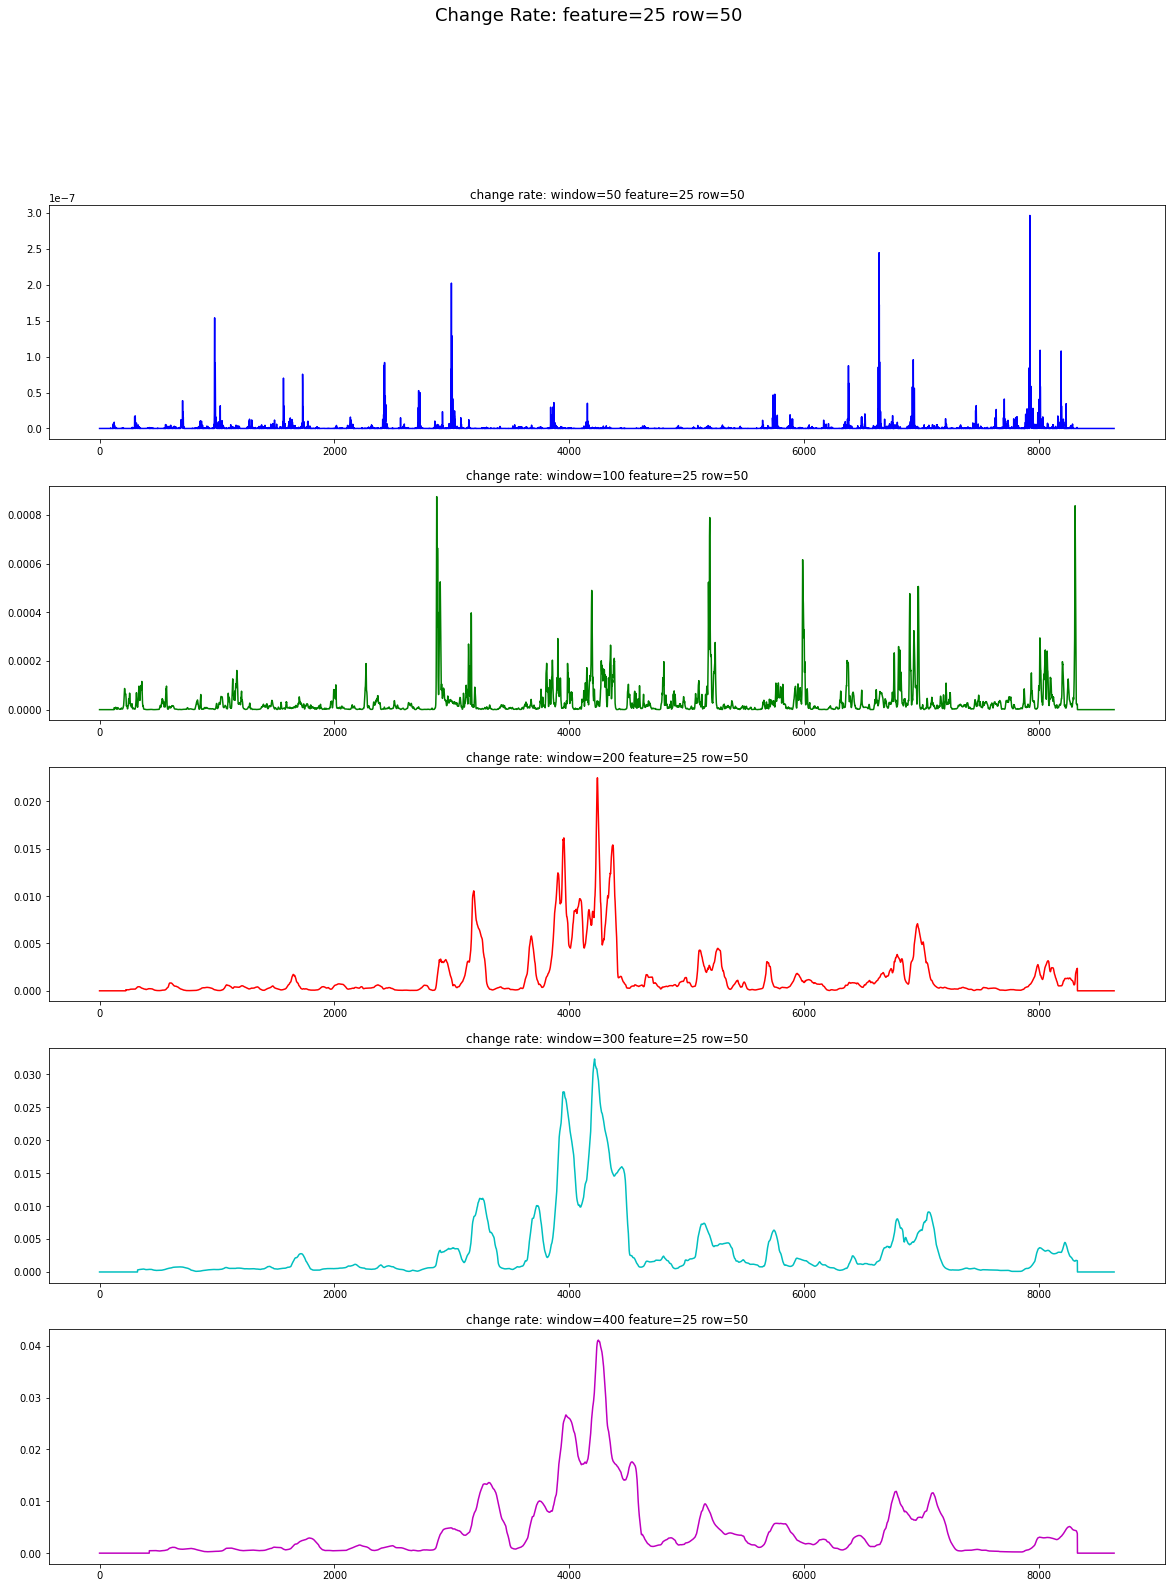

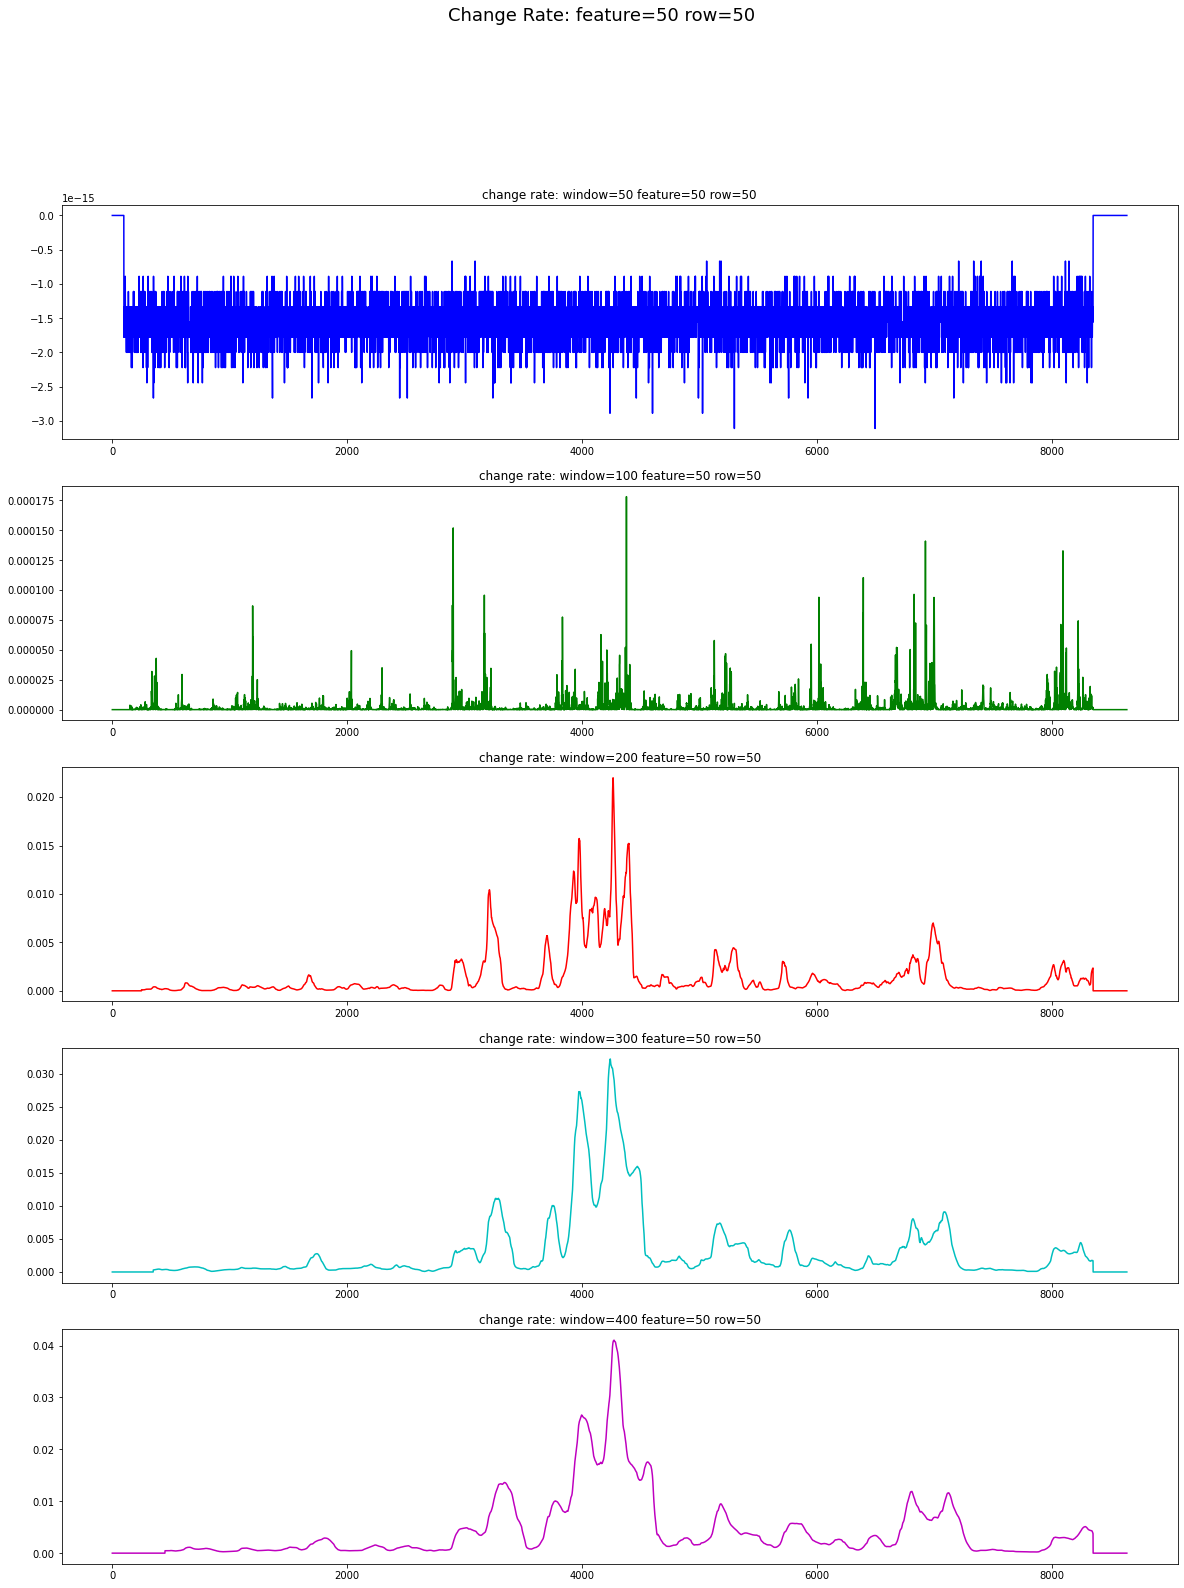

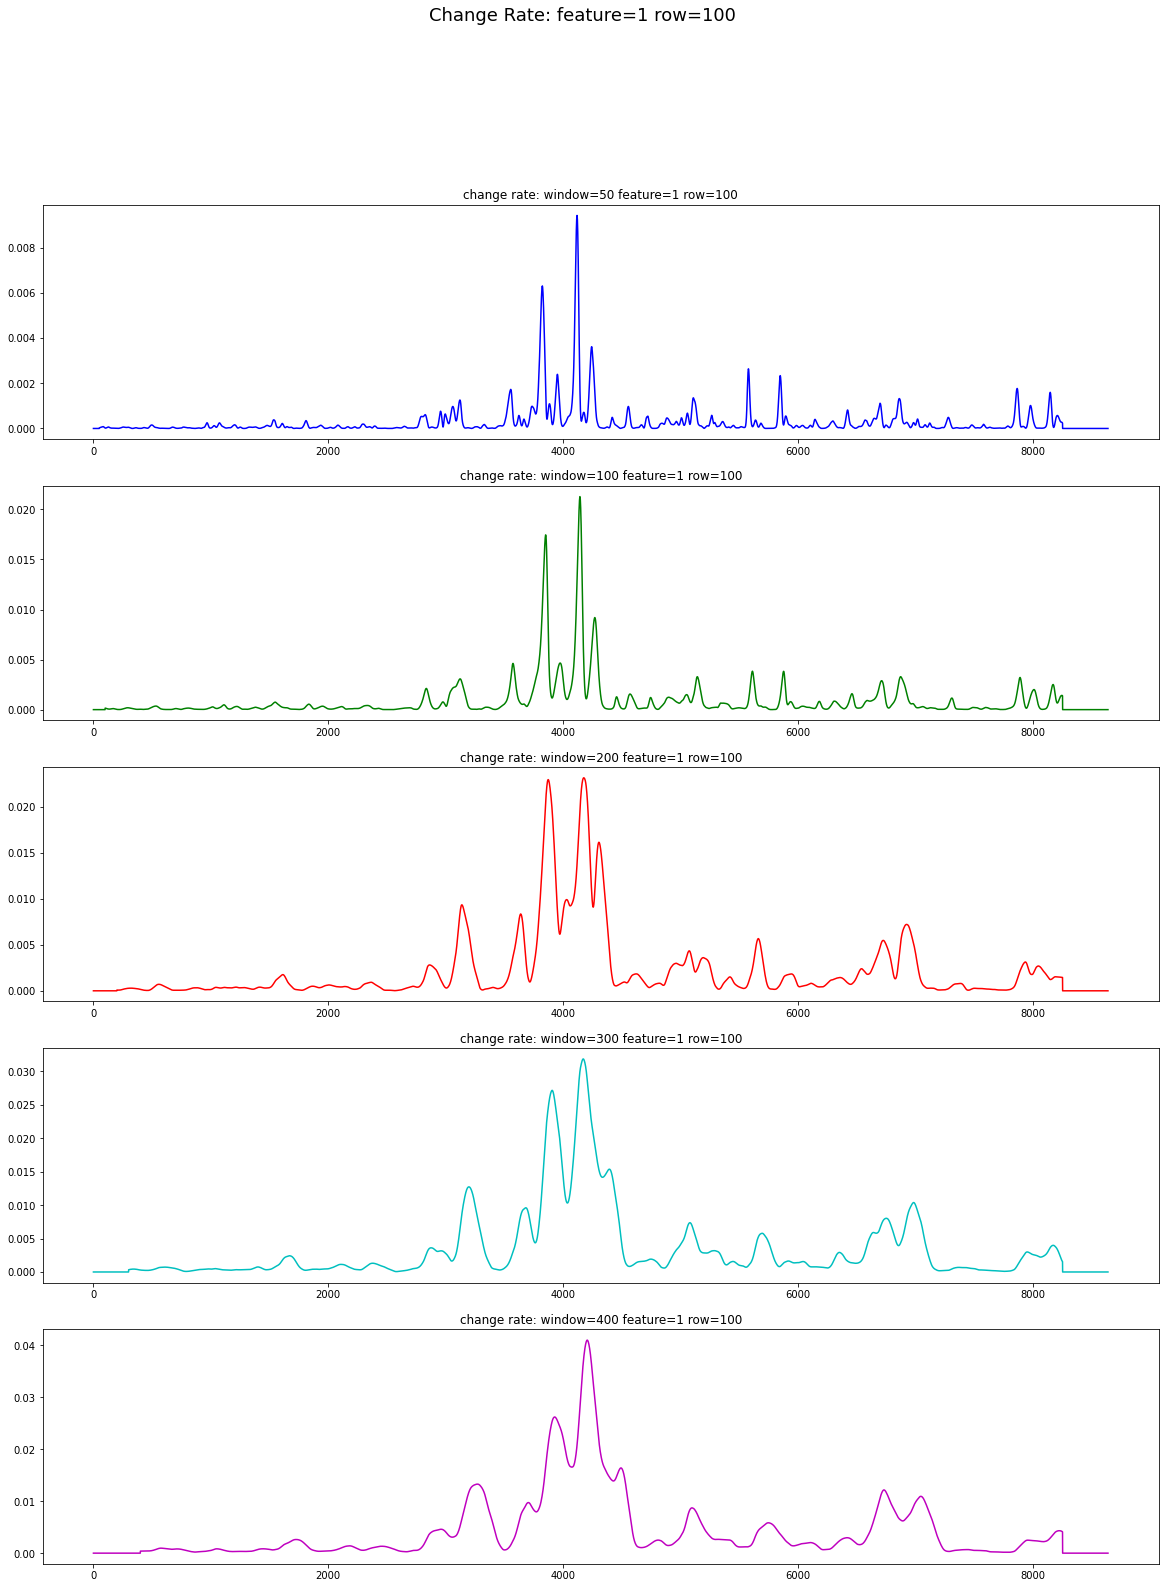

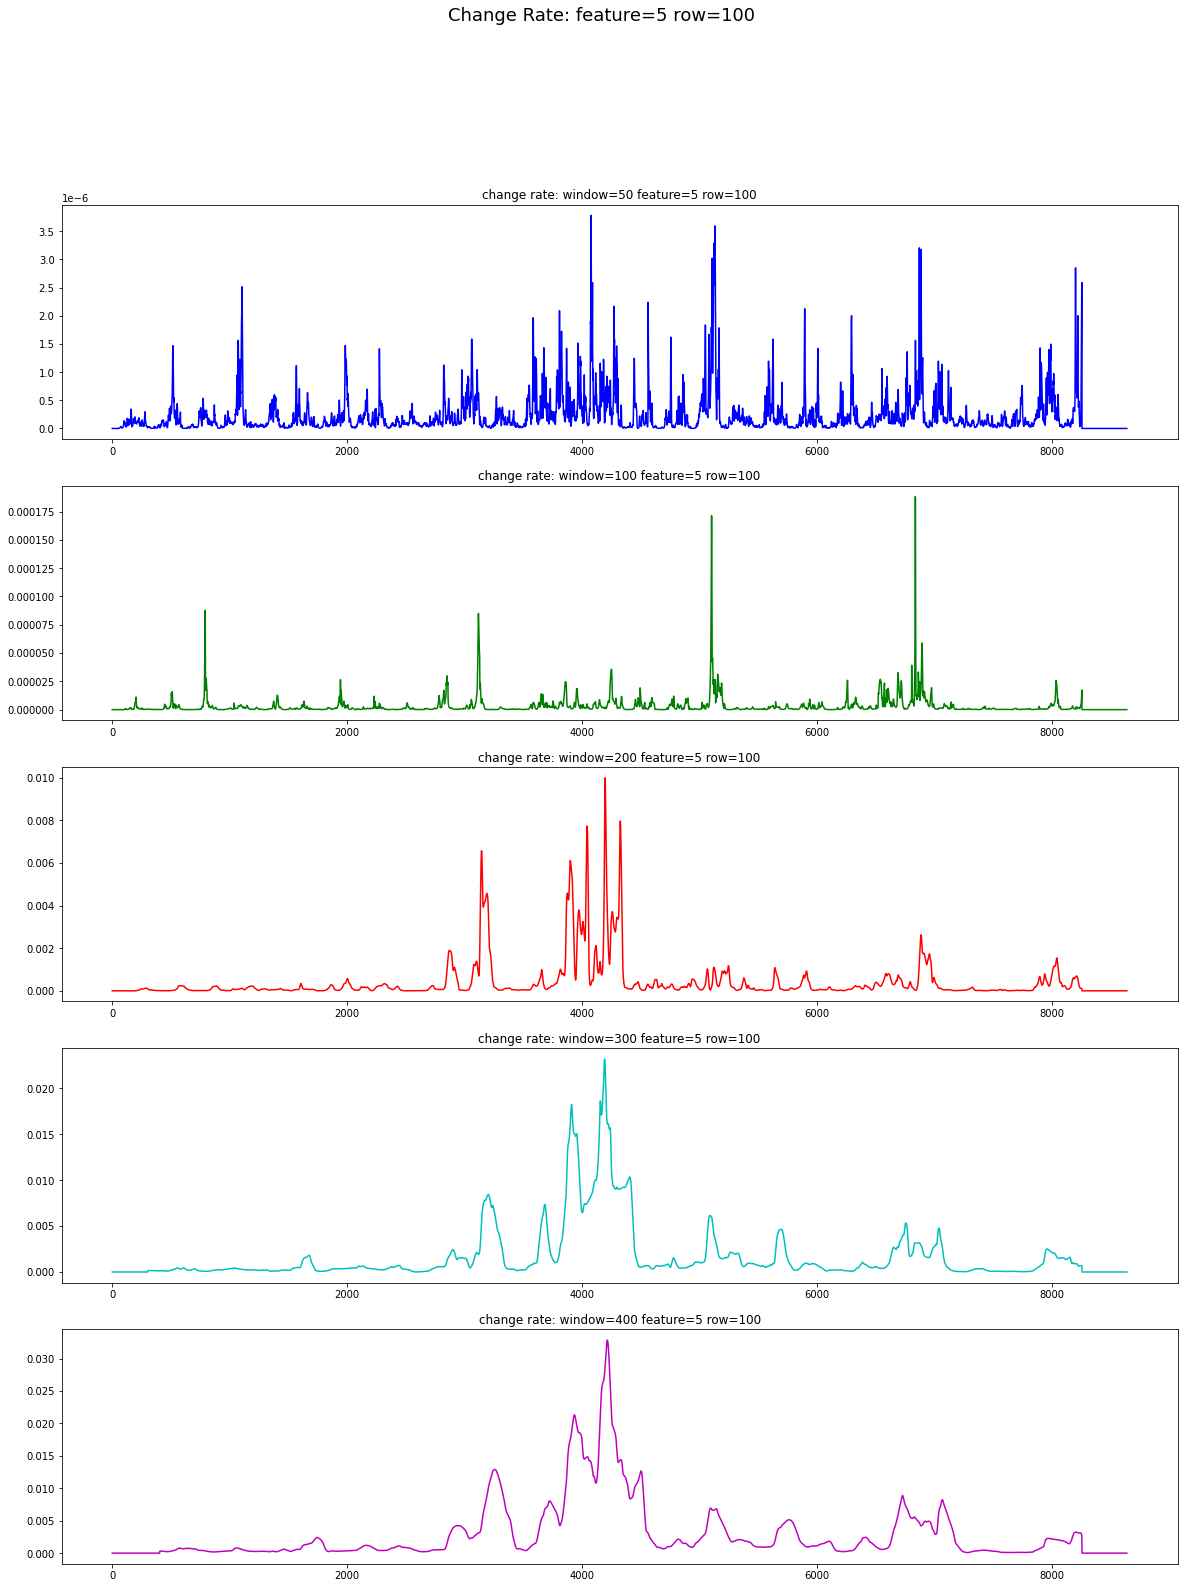

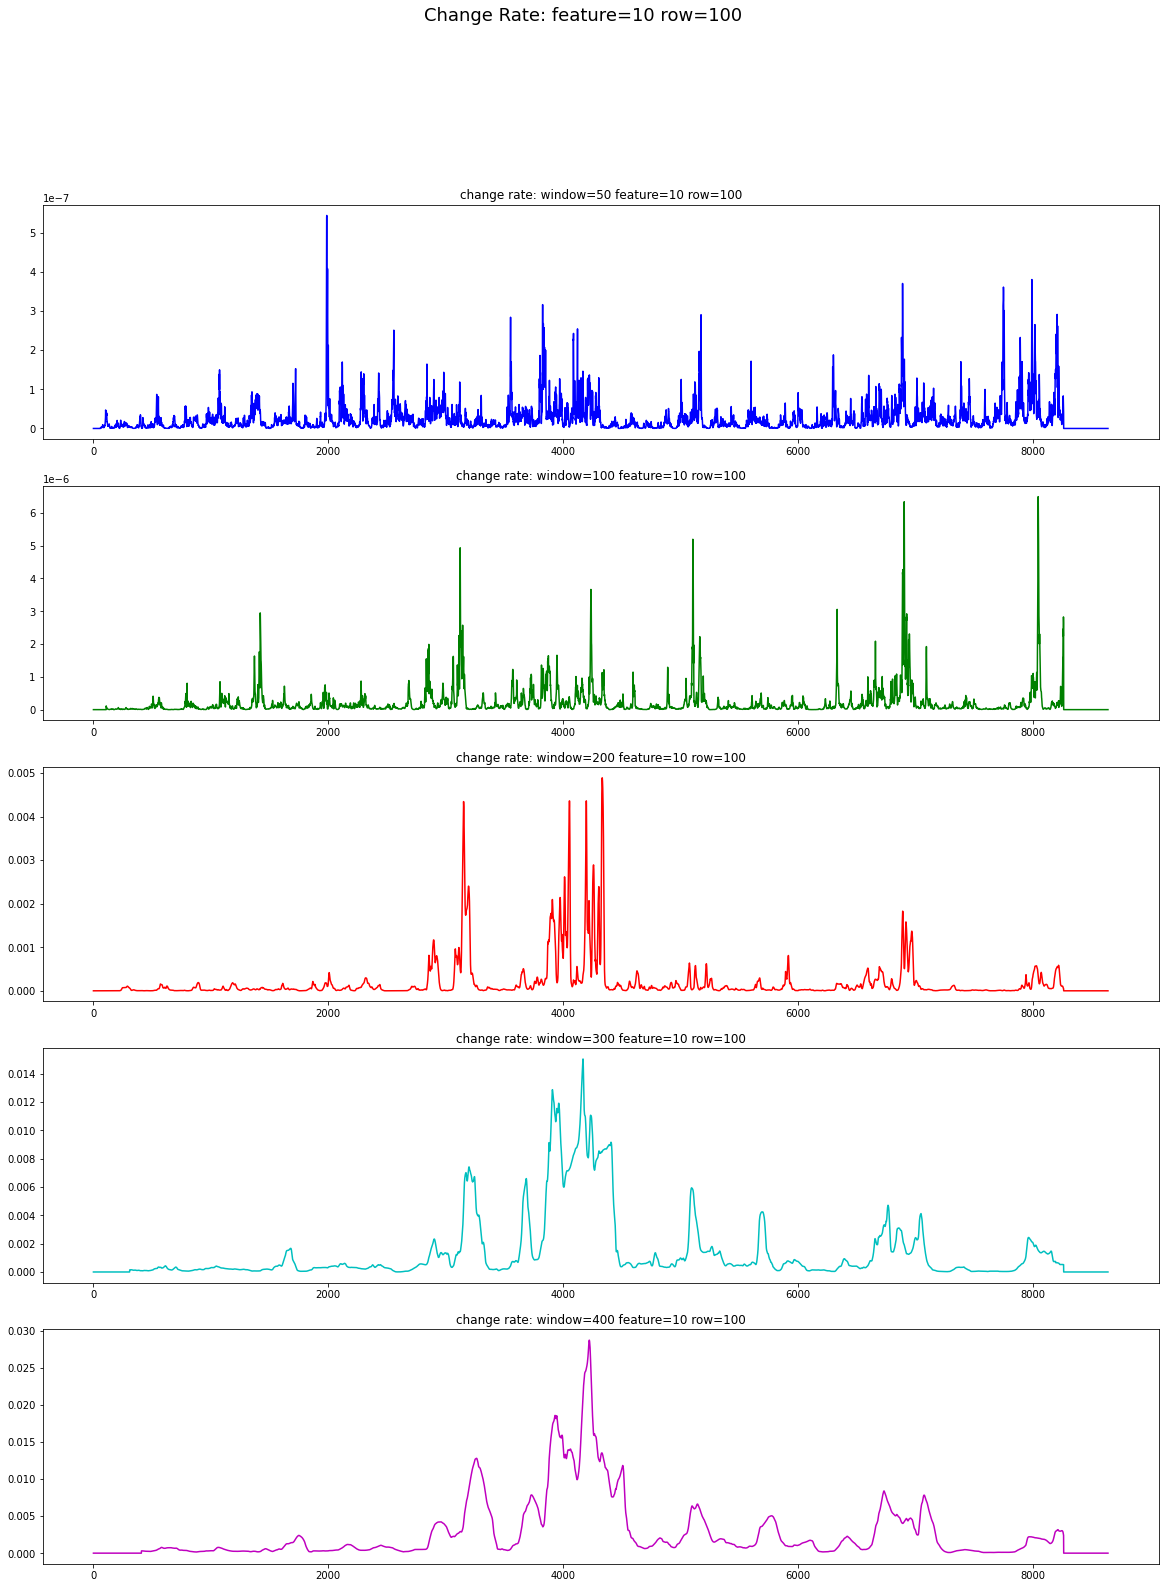

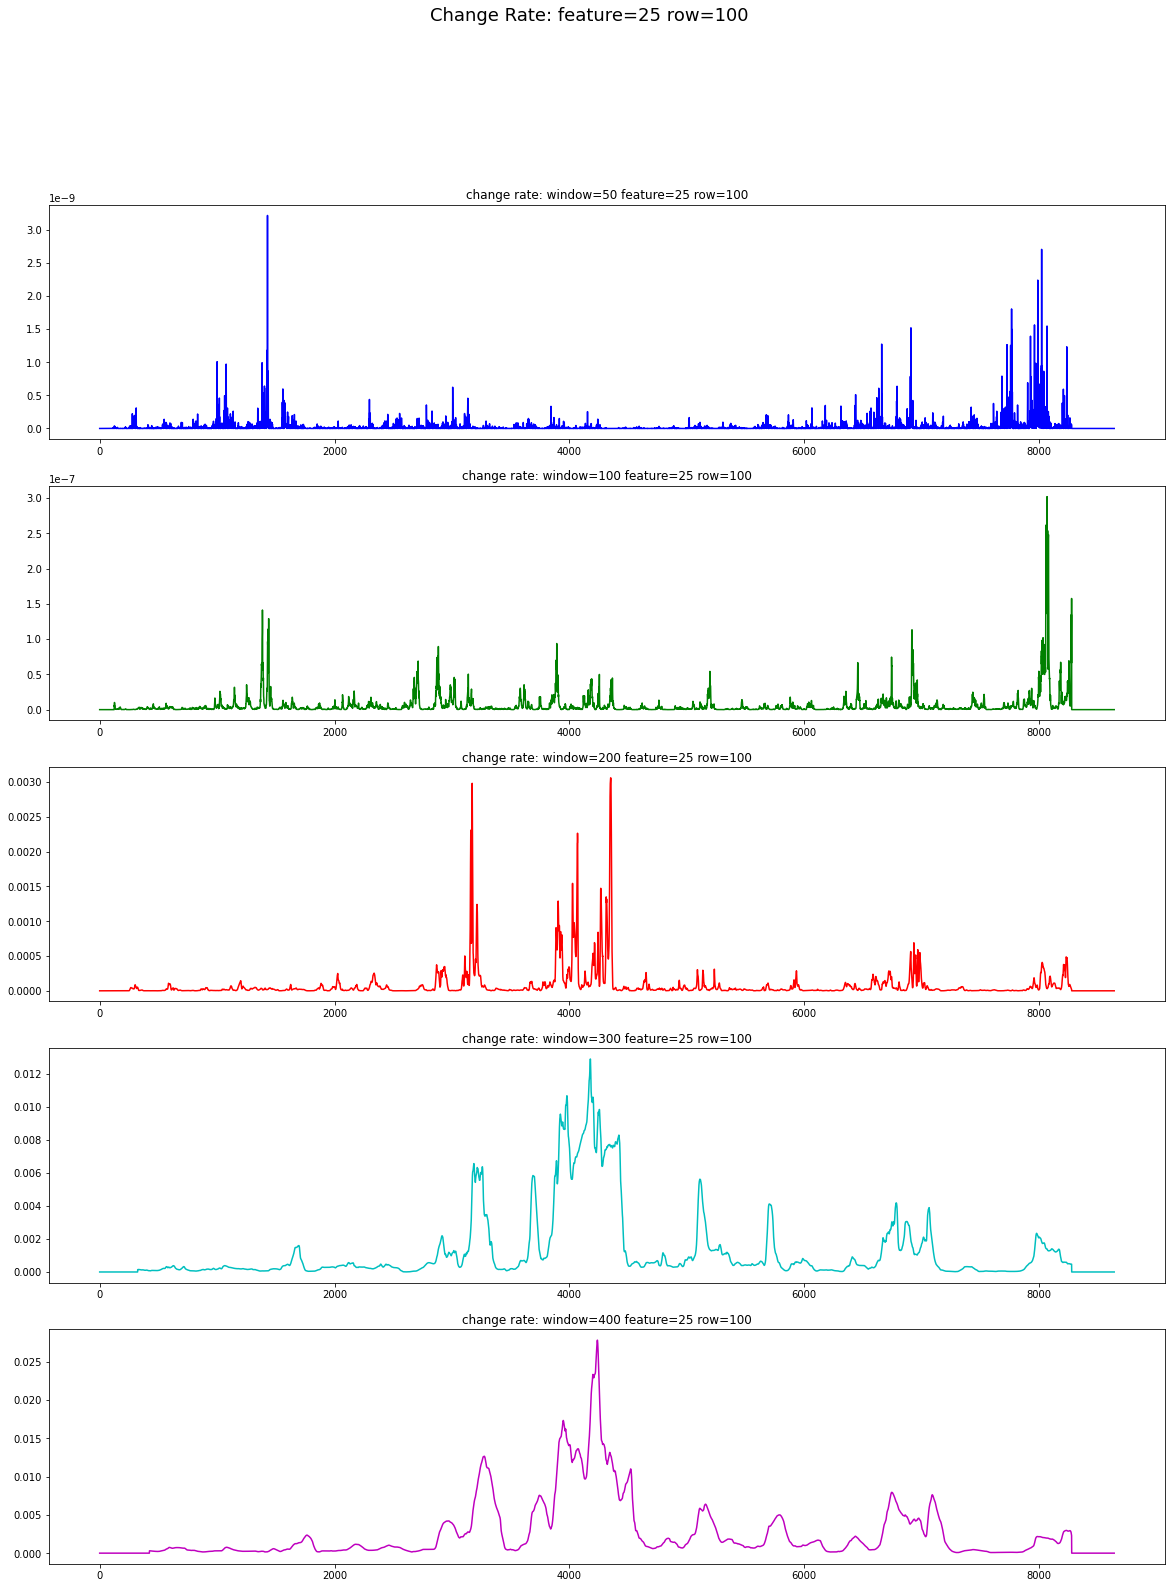

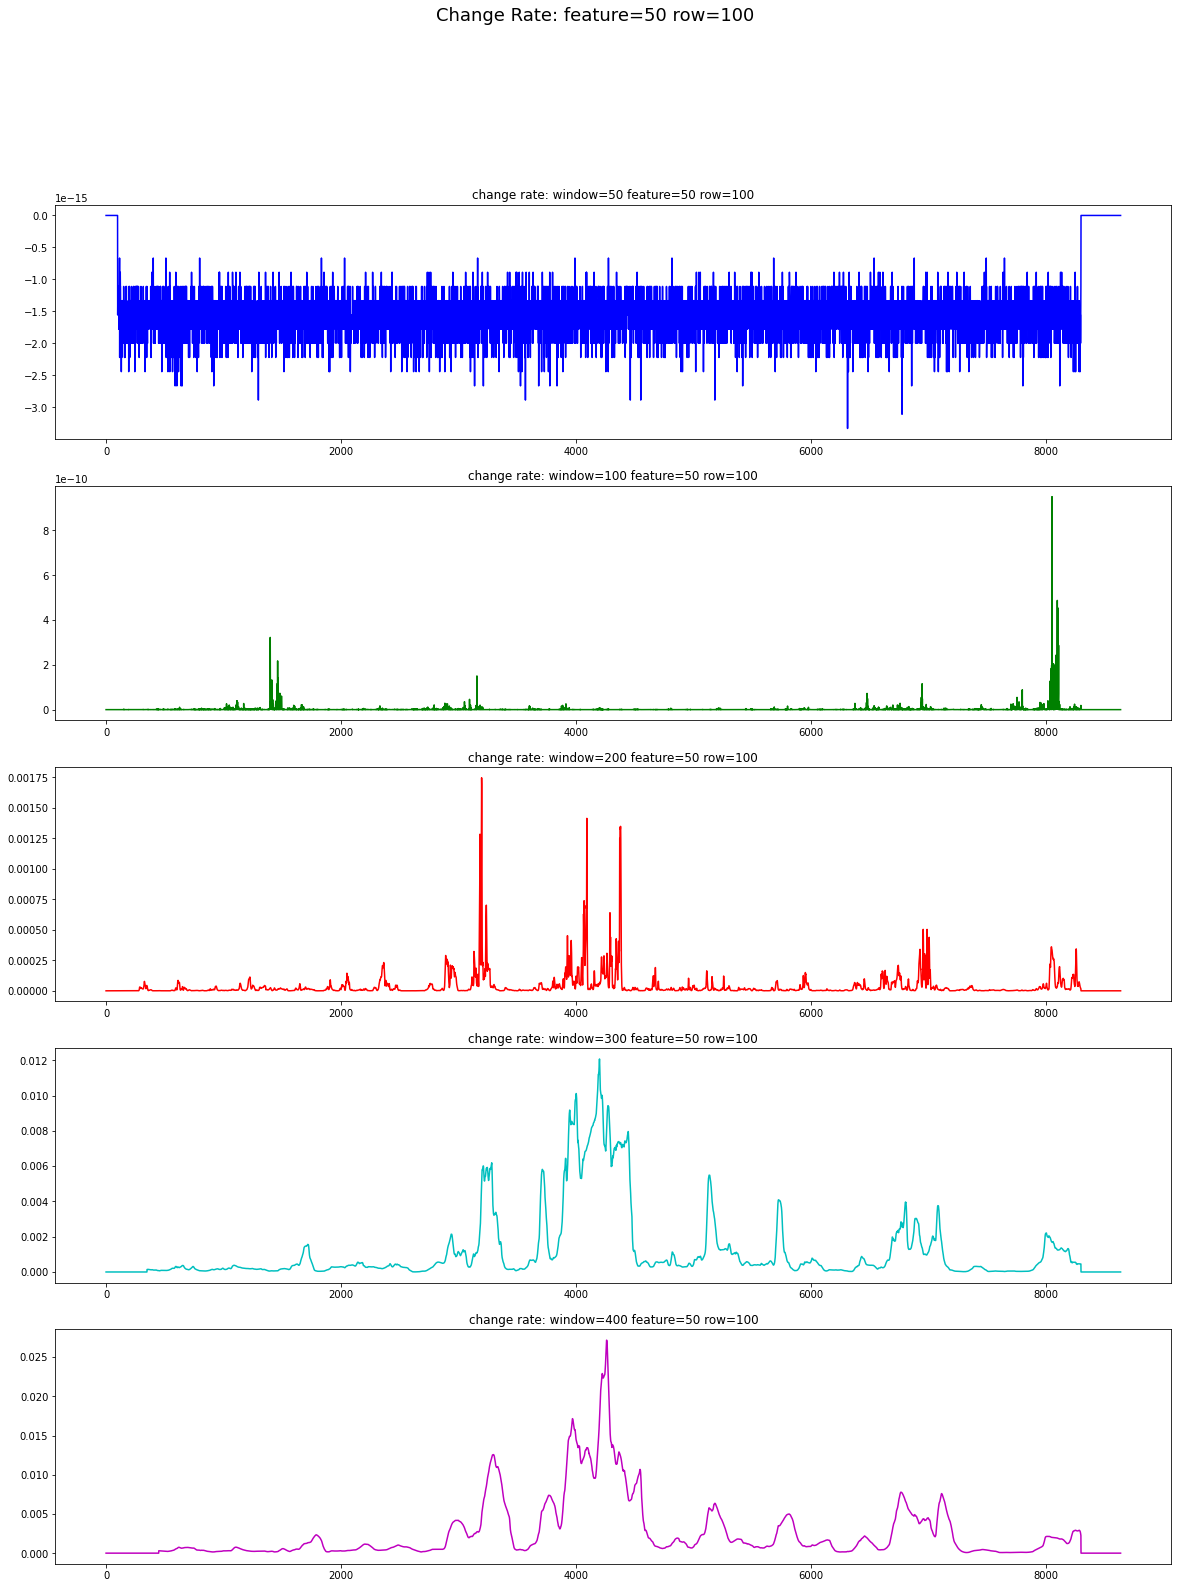

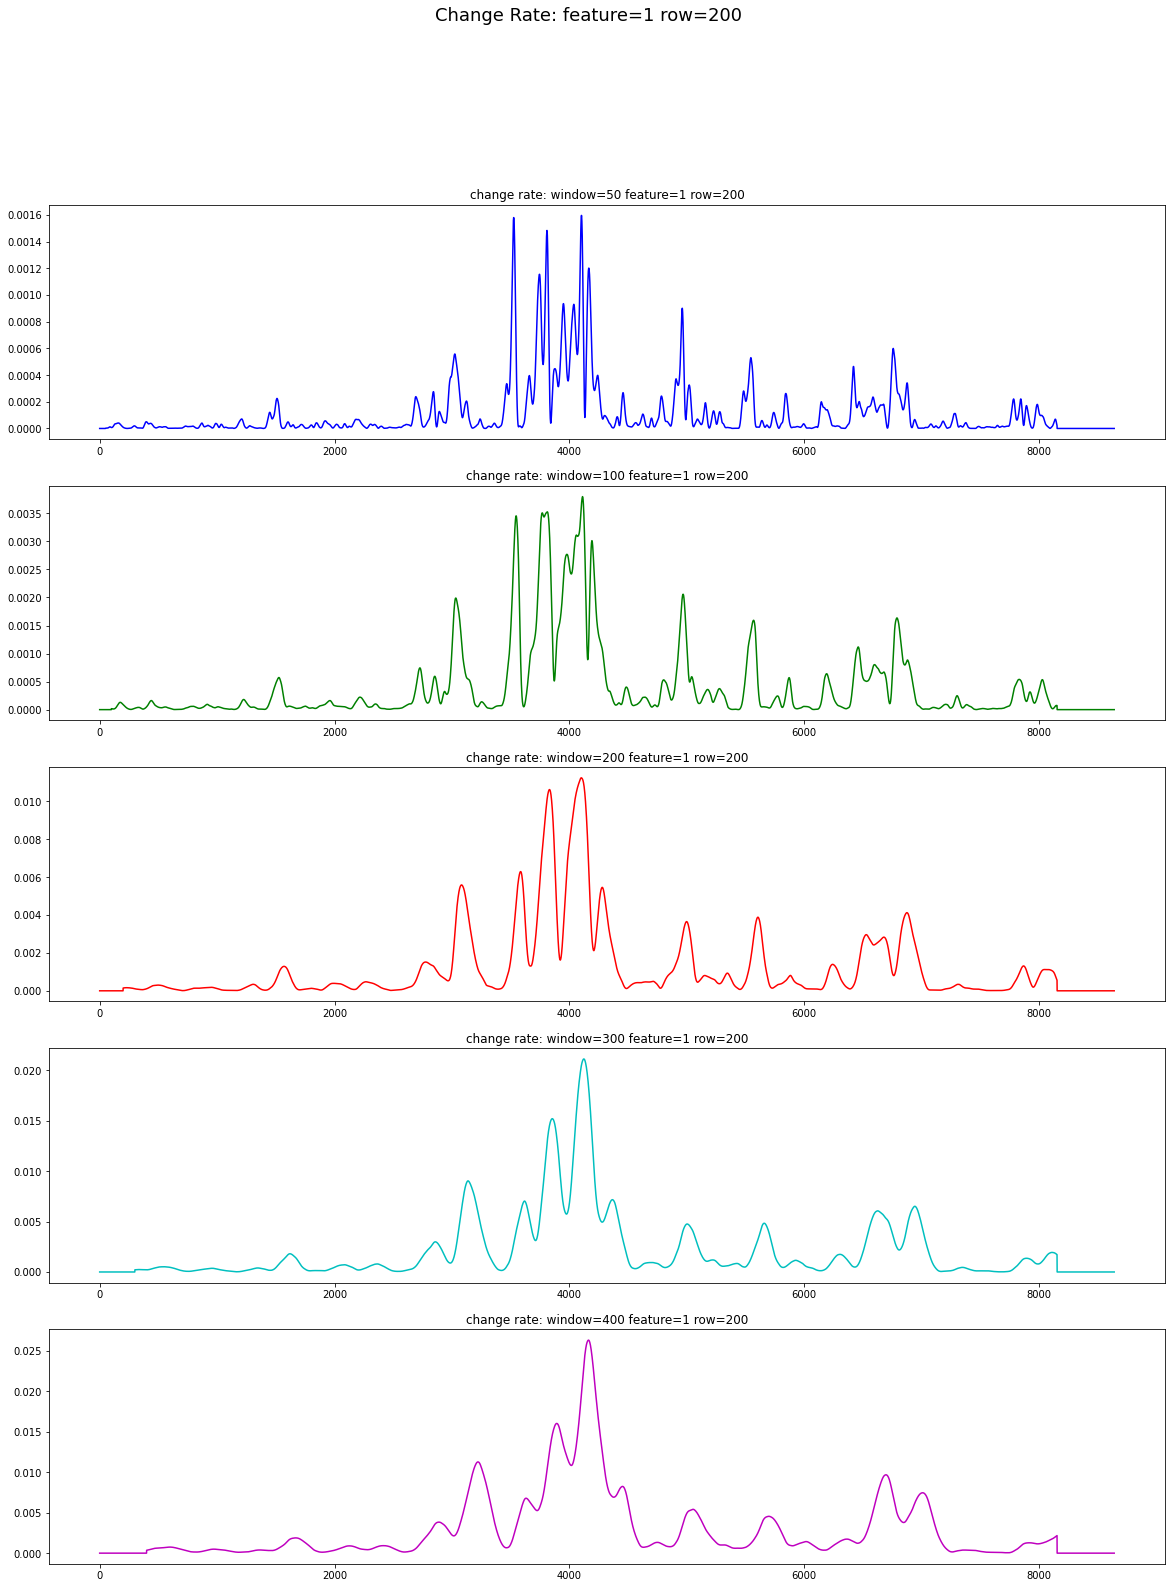

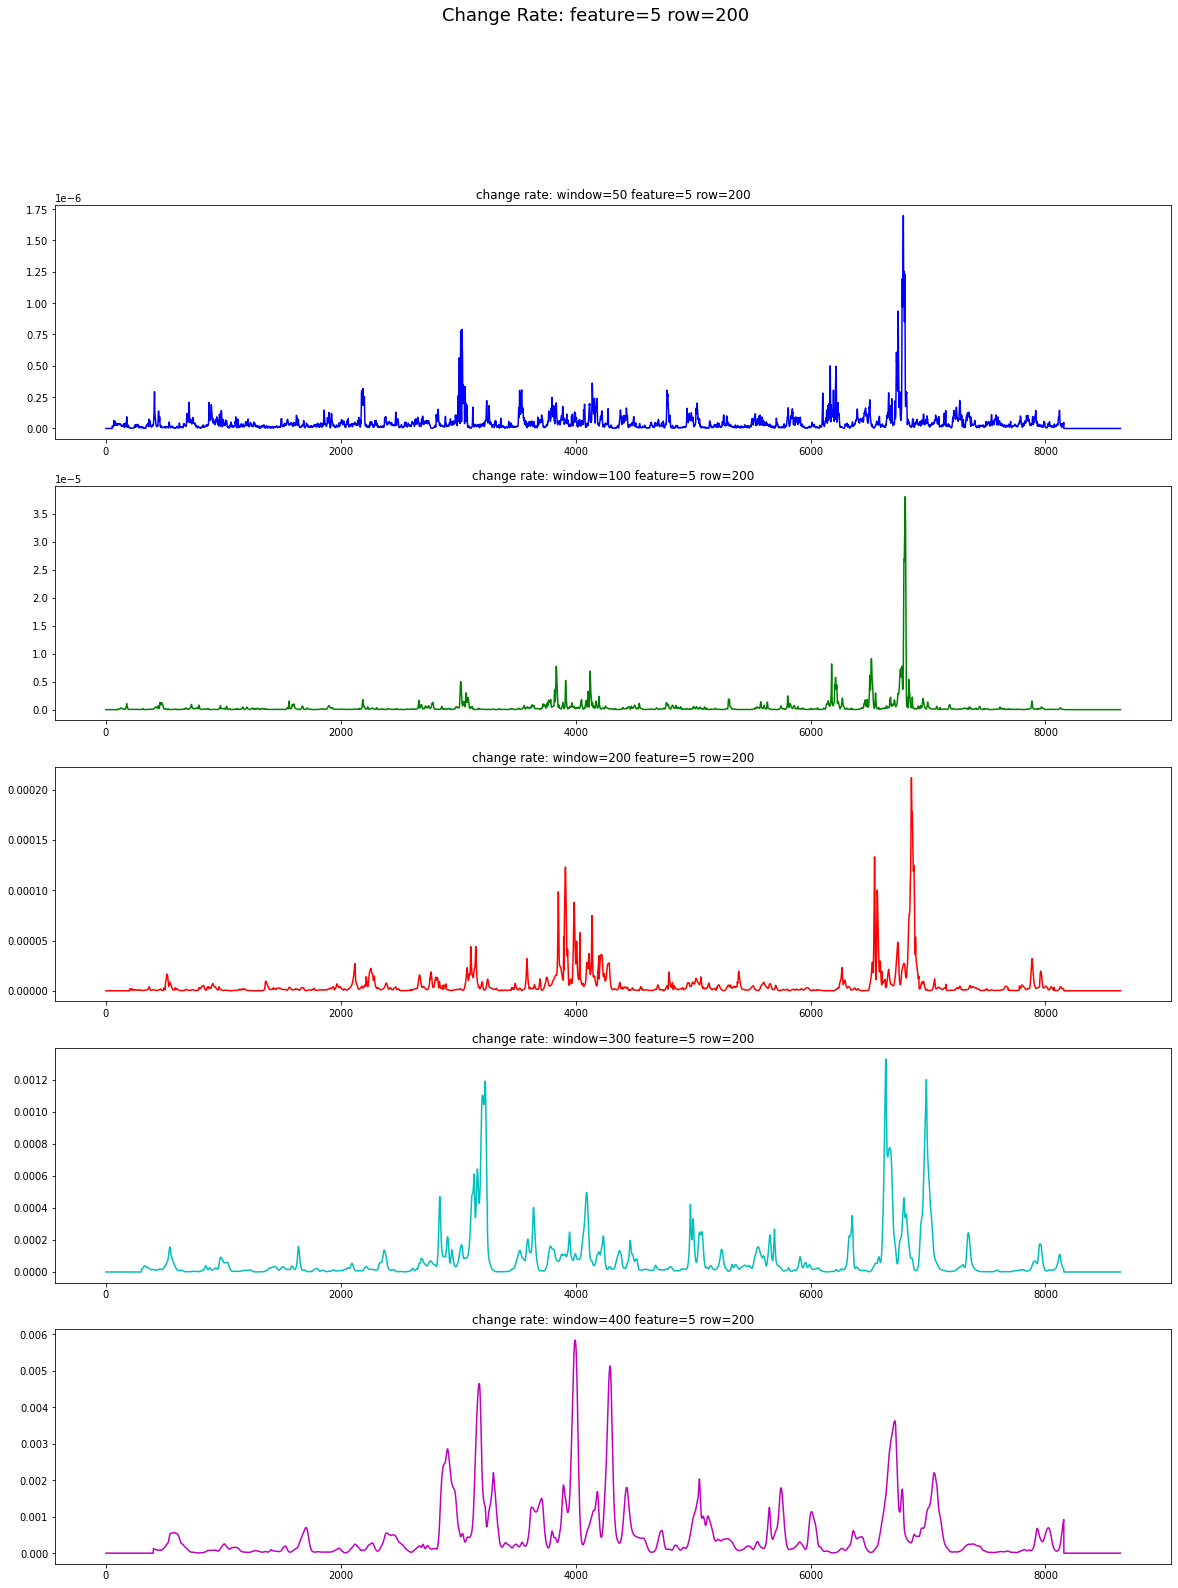

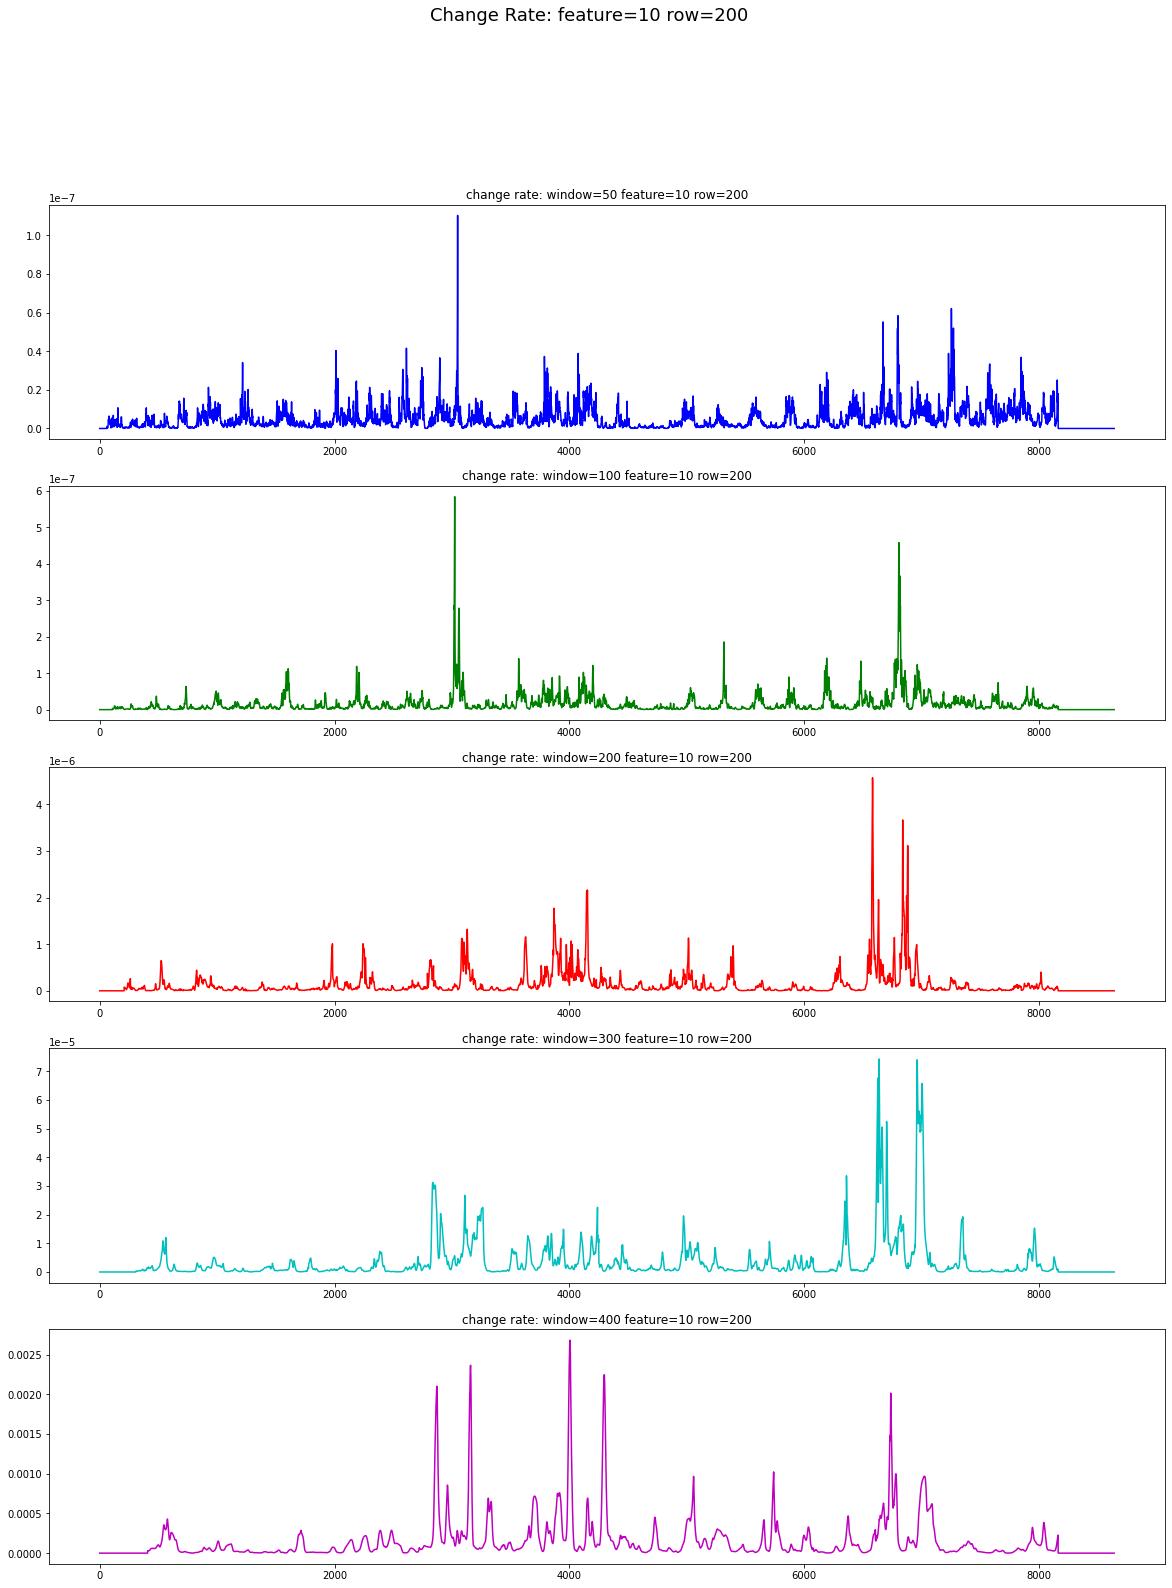

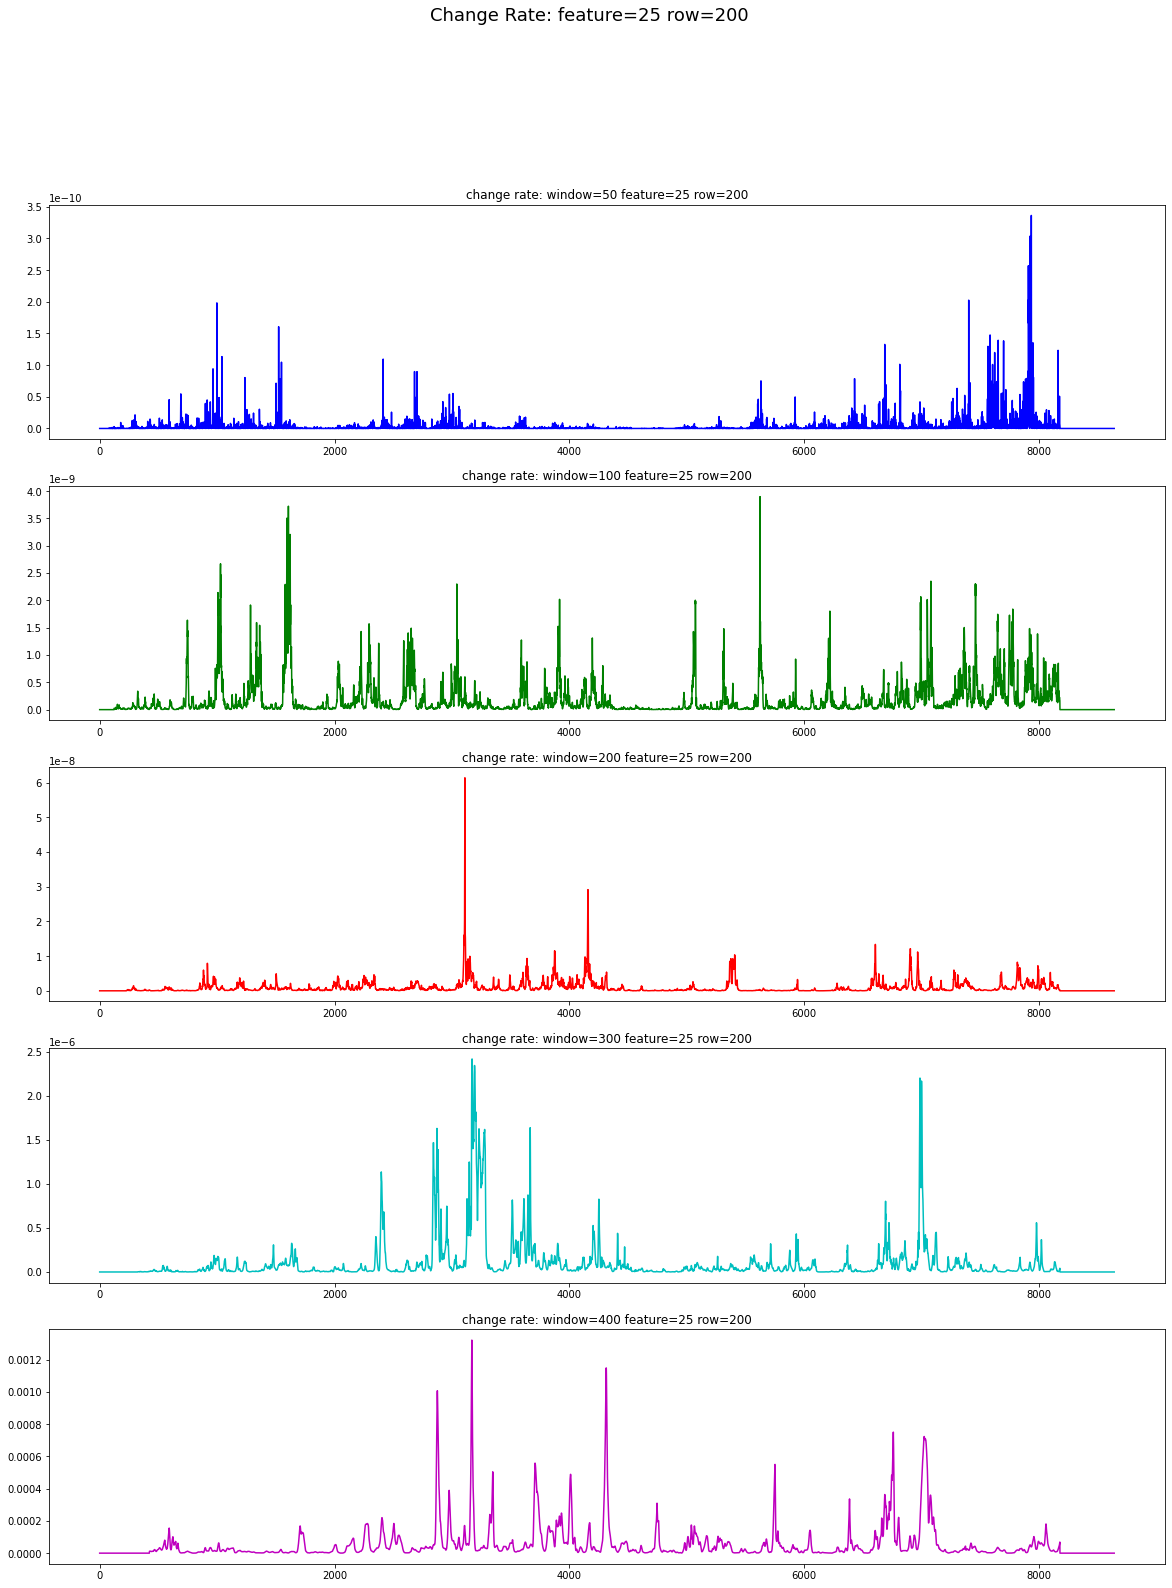

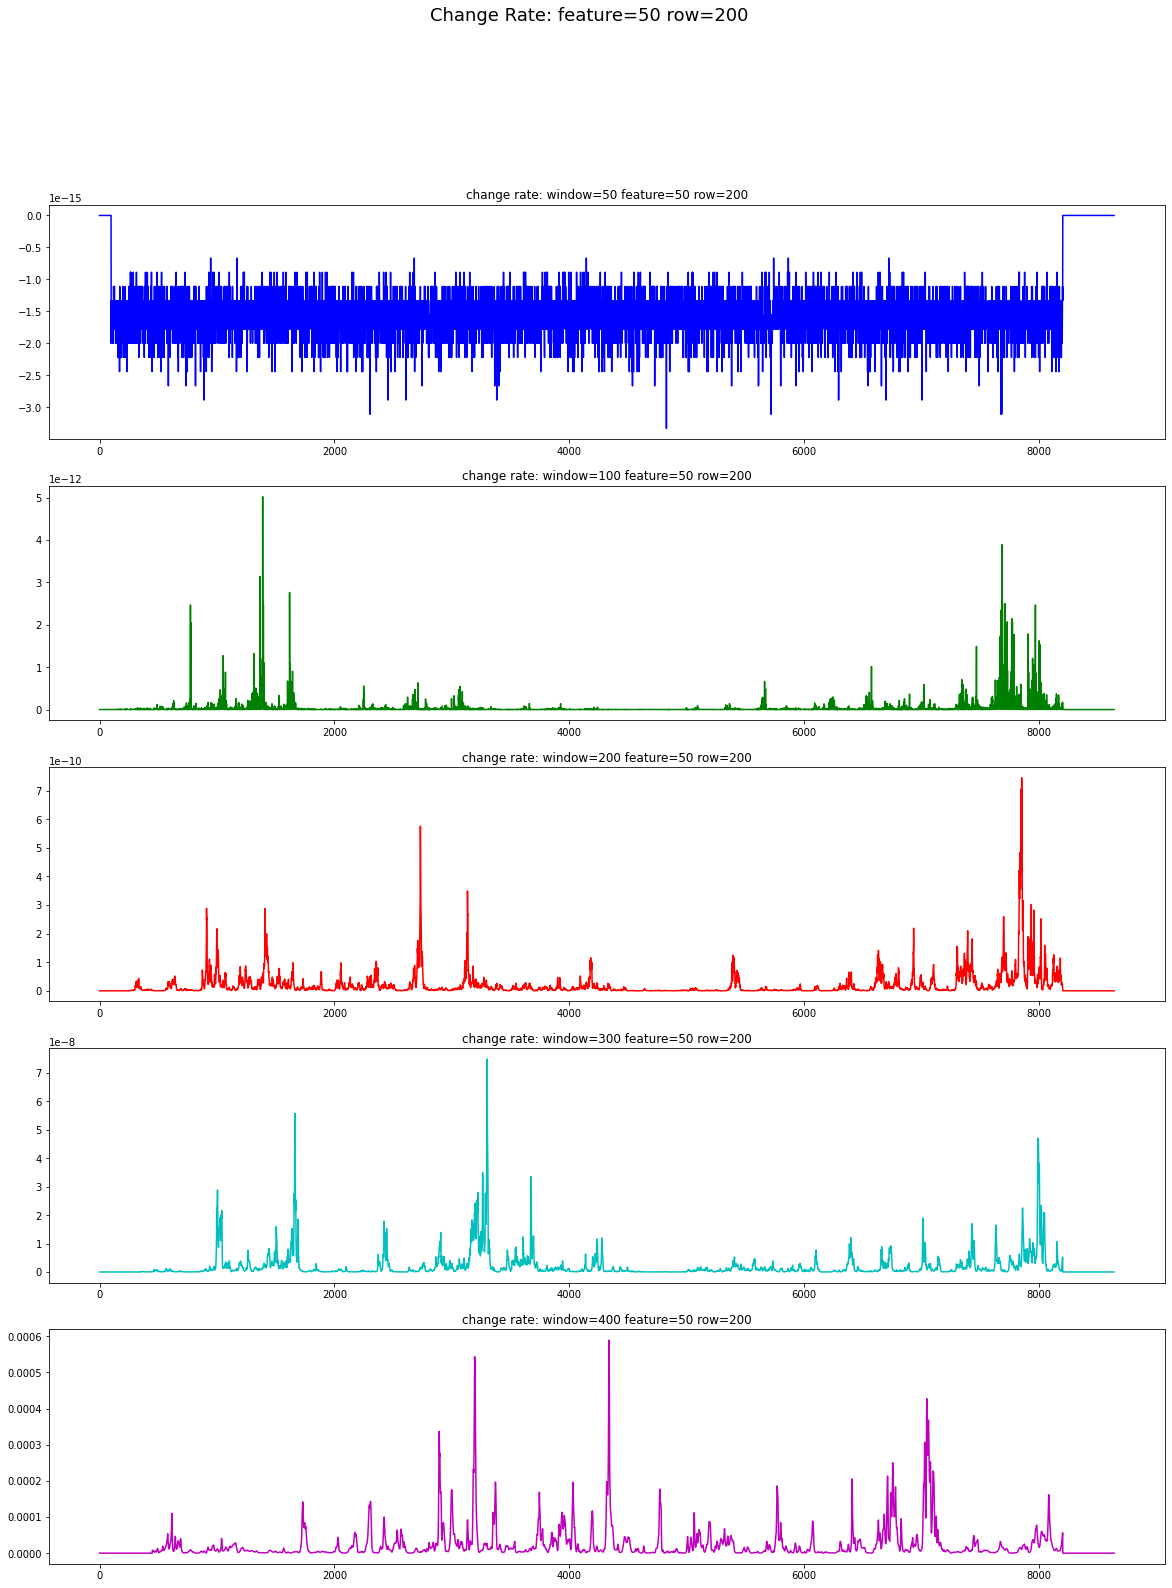

In [0]:
# Decide parameters based on displayed change rate.
# 
# Basically if slide window is wide, then change point detection is
# worked for wide scale range, but it is hard to detect small anormaly,
# and vice versa. In case of the above, slide window is good to set 100 ~ 200.
# 
# If the number of features is big, it maybe cause noise. Whereas if it is small,
# it cannot perceive important feature probably. The number is good to set
# before and after 5, though it depends on the data.

from fittingjob import model
import matplotlib.pyplot as plt
%matplotlib inline

# range of matrix rows
row_range = [5, 10, 50, 100, 200]
#row_range = [50]

# range of features
feature_range = [1, 5, 10, 25, 50]

# range of slide window
window_range = [50, 100, 200, 300, 400]

# lag setting
# If the load seasonality is daily, the lag is good to set
# 288 because default fittingjob image gets metrics as 
# 5 minutes interval (24 hours * 60 minutes / 5 minutes).
lag = 288

for row in row_range:
  for feature in feature_range:
    per_window_rates = []
    for window in window_range:
      sst = model.SingularSpectrumTransformation(
          window_size=window,
          trajectory_rows=row,
          trajectory_features=feature,
          test_rows=row,
          test_features=feature,
          lag=lag,
      )
      sst.fit(df)
      per_window_rates.append(sst.change_rates)

    fig, axs = plt.subplots(nrows=len(window_range), figsize=(20, len(window_range)*5))
    for ax, rate, w, c in zip(axs, per_window_rates, window_range, ['b', 'g', 'r', 'c', 'm']):
      ax.plot(rate, color=c)
      ax.set_title(f'change rate: window={w} feature={feature} row={row}')
    fig.suptitle(f'Change Rate: feature={feature} row={row}', va='bottom', fontsize=18)
    plt.show()
    plt.close()
